### SC1015 SC 10 Mini Project
#### Team 7 
#### Alexssandro U212 xxxxxx
#### Brandon Tan       U2121253 C
#### Wesley          U212 xxxxx

Problem Statement: We are curious to find out how can we incorporate ML to maximize profit while trading in the stock market.


We will be importing our dataset from yahoo finance and we will pick the top marketcap company within all 11 sectors. Among these 5 stocks will be chosen due to limitations, we will perform EDA to pick only 1 stock to perform prediction.

The 11 sectors are as follows: Sectors - Company - Market Cap
- Healthcare Sector - UNH 482.87B
- Materials Sector - DD 39B
- Real Estate Sector - AMT 111.71B
- Consumer Staples Sector -WMT 401.76B
- Consumer Discretionary Sector - AMZN 1.75T
- Utilities Sector - NEE 165B
- Energy Sector - XOM 350.58B
- Industrials Sector BA - 111.9B
- Communication Services Sector - GOOG 1.87T
- financials Sector -V (visa) 463.1B
- Technology Sector - AAPL 2.87T

The top 5 companies are, APPL, GOOG, AMZN, UNH, V

In [138]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
#!pip install git+https://github.com/pydata/pandas-datareader.git
#!pip install yfinance
# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

#!pip install plotly
from plotly.subplots import make_subplots
import plotly.graph_objects as go


# For time stamps
from datetime import datetime
from datetime import timedelta,date

#LSTM
#!pip install scikit-learn
#!pip install tensorflow
import math
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import tensorflow as tf
#ARIMA
from statsmodels.tsa.arima_model import ARIMA
import sklearn.metrics as met

In [139]:
# The tech stocks we'll use for this analysis
tech_companies = ['AAPL', 'GOOG', 'AMZN','UNH','V']

# Set up End and Start times for data grab

endDate = datetime(2022, 3, 11)
startDate = datetime(endDate.year - 5, endDate.month, endDate.day)

for companyName in tech_companies:
    globals()[companyName] = yf.download(companyName, startDate, endDate)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [141]:
company_list = [AAPL, GOOG, AMZN, UNH,V]
company_name = ["APPLE", "GOOGLE", "AMAZON", "UNITED HEALTH","VISA"]

In [142]:
for stock, com_name in zip(company_list, company_name):
    stock["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6300 entries, 2017-03-10 to 2022-03-10
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          6300 non-null   float64
 1   High          6300 non-null   float64
 2   Low           6300 non-null   float64
 3   Close         6300 non-null   float64
 4   Adj Close     6300 non-null   float64
 5   Volume        6300 non-null   int64  
 6   company_name  6300 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 393.8+ KB


In [144]:
df.head()

Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2017-03-10  34.812500  34.840000  34.660000  34.785000  32.842598   78451200   
2017-03-13  34.712502  34.857498  34.705002  34.799999  32.856766   69686800   
2017-03-14  34.825001  34.912498  34.709999  34.747501  32.807205   61236400   
2017-03-15  34.852501  35.187500  34.757500  35.115002  33.154167  102767200   
2017-03-16  35.180000  35.255001  35.064999  35.172501  33.208466   76928000   

           company_name  
Date                     
2017-03-10        APPLE  
2017-03-13        APPLE  
2017-03-14        APPLE  
2017-03-15        APPLE  
2017-03-16        APPLE

In [145]:
AAPL.describe()

Open         High          Low        Close    Adj Close  \
count  1260.000000  1260.000000  1260.000000  1260.000000  1260.000000   
mean     79.733574    80.619018    78.874047    79.783371    78.574558   
std      43.473641    44.003515    42.920130    43.478081    43.953247   
min      34.712502    34.840000    34.654999    34.747501    32.807205   
25%      43.688749    43.900001    43.396251    43.734376    42.078811   
50%      55.895000    56.523750    55.161251    55.951250    54.275852   
75%     121.817499   123.539997   120.275002   121.779999   120.879845   
max     182.630005   182.940002   179.119995   182.009995   181.778397   

             Volume  
count  1.260000e+03  
mean   1.203227e+08  
std    5.549131e+07  
min    4.100000e+07  
25%    8.347248e+07  
50%    1.053918e+08  
75%    1.406946e+08  
max    4.265100e+08

In [146]:

AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1260 entries, 2017-03-10 to 2022-03-10
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1260 non-null   float64
 1   High          1260 non-null   float64
 2   Low           1260 non-null   float64
 3   Close         1260 non-null   float64
 4   Adj Close     1260 non-null   float64
 5   Volume        1260 non-null   int64  
 6   company_name  1260 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 78.8+ KB


In [147]:
GOOG.describe()

Open         High          Low        Close    Adj Close  \
count  1260.000000  1260.000000  1260.000000  1260.000000  1260.000000   
mean   1513.249151  1528.505647  1498.695975  1514.010035  1514.010035   
std     628.840921   634.597431   622.474493   628.283707   628.283707   
min     806.950012   821.630005   803.369995   814.429993   814.429993   
25%    1077.410034  1089.855042  1065.202484  1078.687469  1078.687469   
50%    1221.604980  1230.409973  1209.309998  1218.880005  1218.880005   
75%    1757.562531  1773.602478  1741.559967  1760.230042  1760.230042   
max    3037.270020  3042.000000  2997.750000  3014.179932  3014.179932   

             Volume  
count  1.260000e+03  
mean   1.566105e+06  
std    6.951508e+05  
min    3.468000e+05  
25%    1.124500e+06  
50%    1.393000e+06  
75%    1.783100e+06  
max    6.207000e+06

In [148]:
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1260 entries, 2017-03-10 to 2022-03-10
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1260 non-null   float64
 1   High          1260 non-null   float64
 2   Low           1260 non-null   float64
 3   Close         1260 non-null   float64
 4   Adj Close     1260 non-null   float64
 5   Volume        1260 non-null   int64  
 6   company_name  1260 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 78.8+ KB


In [149]:
AMZN.describe()

Open         High          Low        Close    Adj Close  \
count  1260.000000  1260.000000  1260.000000  1260.000000  1260.000000   
mean   2170.088112  2193.207260  2143.861096  2168.768714  2168.768714   
std     862.899728   873.372552   851.214509   861.514078   861.514078   
min     838.070007   849.369995   833.500000   843.200012   843.200012   
25%    1587.725037  1600.807495  1573.089996  1587.955048  1587.955048   
50%    1871.984985  1889.090027  1854.760010  1869.735046  1869.735046   
75%    3149.397583  3185.559998  3109.189941  3145.194885  3145.194885   
max    3744.000000  3773.080078  3696.790039  3731.409912  3731.409912   

             Volume  
count  1.260000e+03  
mean   4.293388e+06  
std    2.065988e+06  
min    8.813000e+05  
25%    2.904150e+06  
50%    3.704500e+06  
75%    5.079850e+06  
max    1.656500e+07

In [150]:
AMZN.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1260 entries, 2017-03-10 to 2022-03-10
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1260 non-null   float64
 1   High          1260 non-null   float64
 2   Low           1260 non-null   float64
 3   Close         1260 non-null   float64
 4   Adj Close     1260 non-null   float64
 5   Volume        1260 non-null   int64  
 6   company_name  1260 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 78.8+ KB


In [151]:
UNH.describe()

Open         High          Low        Close    Adj Close  \
count  1260.000000  1260.000000  1260.000000  1260.000000  1260.000000   
mean    289.407540   292.392722   286.417214   289.490413   280.151083   
std      82.618061    83.437426    81.964466    82.731722    86.232118   
min     163.649994   164.970001   162.740005   163.440002   151.678085   
25%     232.967503   235.100006   230.067501   232.880001   221.235386   
50%     264.690002   267.389999   262.485001   264.949997   252.174217   
75%     335.029999   338.152496   332.047501   334.662498   328.554504   
max     507.929993   509.230011   503.649994   505.579987   504.088287   

             Volume  
count  1.260000e+03  
mean   3.544366e+06  
std    1.952523e+06  
min    7.140000e+05  
25%    2.477775e+06  
50%    3.041850e+06  
75%    4.058150e+06  
max    2.736140e+07

In [152]:
UNH.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1260 entries, 2017-03-10 to 2022-03-10
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1260 non-null   float64
 1   High          1260 non-null   float64
 2   Low           1260 non-null   float64
 3   Close         1260 non-null   float64
 4   Adj Close     1260 non-null   float64
 5   Volume        1260 non-null   int64  
 6   company_name  1260 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 78.8+ KB


In [153]:
V.describe()

Open         High          Low        Close    Adj Close  \
count  1260.000000  1260.000000  1260.000000  1260.000000  1260.000000   
mean    167.647032   169.187564   166.030024   167.610714   165.335732   
std      44.332892    44.829766    43.819685    44.275480    44.983687   
min      87.849998    88.849998    87.849998    88.059998    85.280273   
25%     131.269997   132.485001   130.204998   131.274998   128.367966   
50%     174.630005   176.669998   172.840004   174.904999   172.244003   
75%     206.512501   208.227505   204.677498   206.402496   204.667671   
max     250.050003   252.669998   248.220001   250.929993   249.741714   

             Volume  
count  1.260000e+03  
mean   8.522509e+06  
std    3.699111e+06  
min    2.420900e+06  
25%    6.105825e+06  
50%    7.594900e+06  
75%    9.843550e+06  
max    3.837960e+07

In [154]:
V.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1260 entries, 2017-03-10 to 2022-03-10
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1260 non-null   float64
 1   High          1260 non-null   float64
 2   Low           1260 non-null   float64
 3   Close         1260 non-null   float64
 4   Adj Close     1260 non-null   float64
 5   Volume        1260 non-null   int64  
 6   company_name  1260 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 78.8+ KB


In [155]:
#mpf.plot(V[start : end],type = 'candle',mav=(20,50),tight_layout=False,title="Visa",volume = True)

fig = go.Figure(data=[go.Candlestick(x=V.index,
            open=V['Open'],
            high=V['High'],
            low=V['Low'],
            close=V['Close'])])
fig.update_layout(
    title='Visa'
)
fig.show()

In [156]:
#mpf.plot(AMZN[start : end],type = 'candle',mav=(20,50),tight_layout=False,title="Amazon",volume = True)

fig = go.Figure(data=[go.Candlestick(x=AMZN.index,
            open=AMZN['Open'],
            high=AMZN['High'],
            low=AMZN['Low'],
            close=AMZN['Close'])])
fig.update_layout(
    title='Amazon'
)
fig.show()

In [157]:
fig = go.Figure(data=[go.Candlestick(x=AAPL.index,
            open=AAPL['Open'],
            high=AAPL['High'],
            low=AAPL['Low'],
            close=AAPL['Close'])])
fig.update_layout(
    title='APPLE'
)
fig.show()

In [158]:
fig = go.Figure(data=[go.Candlestick(x=UNH.index,
            open=UNH['Open'],
            high=UNH['High'],
            low=UNH['Low'],
            close=UNH['Close'])])
fig.update_layout(
    title='United Health'
)
fig.show()


In [159]:
#mpf.plot(GOOG[start : end],type = 'candle',mav=(20,50),tight_layout=False,title="Google",volume = True)

fig = go.Figure(data=[go.Candlestick(x=GOOG.index,
            open=GOOG['Open'],
            high=GOOG['High'],
            low=GOOG['Low'],
            close=GOOG['Close'])])
fig.update_layout(
    title='Google'
)
fig.show()



<AxesSubplot:xlabel='Volume', ylabel='company_name'>

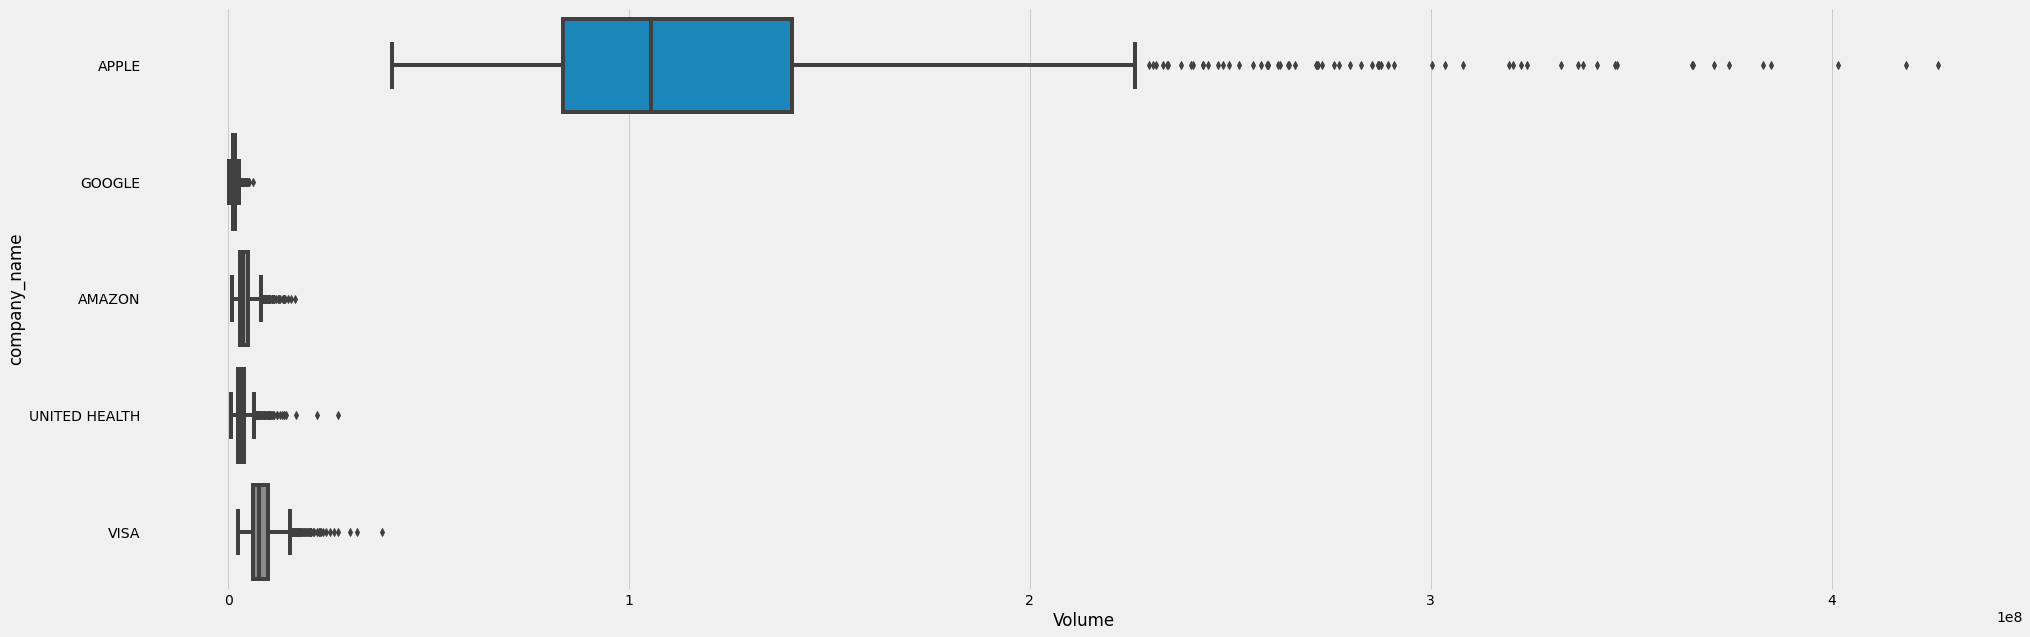

In [160]:
plt.figure(figsize=(30,10))
sns.boxplot(x=df["Volume"],y=df["company_name"],data =df)

In [161]:
def addCols(name):
    for names in name:
        names['Open-high'] = names['Open']-names['High']
        names['Open-low'] = names['Open'] - names['Low']
        names['Close-high'] = names['Close']-names['High']
        names['Close-low'] = names['Close'] - names['Low']
        names['High-low'] = names['High'] - names['Low']
        names['Open-close'] = names['Open'] - names['Close']

#### The functions is used so we can have comparison between the fluctuation of a stock withing said date.

In [162]:
addCols(company_list)

In [163]:
#print("Adding moving avg to {name}".format(name = stockName))
V['DateTime'] = V.index
V['New_ID'] = range(1, 1+len(V))
V.index = V['New_ID']
V= V.drop(['New_ID'],axis=1)
ma_day = [30, 50]
for ma in ma_day:
    column_name = f"MovingAvg_{ma}"
    V[column_name] = V['Close'].rolling(ma).mean()
#print(len(data))
for ma in ma_day:
    #print("in 1")
    column_name = f"MovingAvg_{ma}"
    column_df = pd.DataFrame(V[column_name])
    #date = datetime(2021, 3, 10)
    for day in range(1,ma+1):
        #print("In 2")
        _ = V.head(day)['Close']
        avg = sum(_)/(day)
        V.at[day,column_name] = avg
    #print("out of 2 loop")
V.index = V['DateTime'] #change back index to date time for ML 
V= V.drop(['DateTime'],axis=1) #drop
#print("Adding moving avg to {name}, {name} head:".format(name = stockName))
V.head(50)

Open       High        Low      Close  Adj Close    Volume  \
DateTime                                                                      
2017-03-10  89.500000  89.860001  89.099998  89.730003  86.897568  12246700   
2017-03-13  89.800003  90.309998  89.610001  90.110001  87.265564   8944100   
2017-03-14  89.930000  90.029999  89.239998  89.550003  86.723236   6009400   
2017-03-15  89.750000  90.099998  89.410004  89.919998  87.081551   6350700   
2017-03-16  90.309998  90.330002  89.470001  90.040001  87.197769   9174400   
2017-03-17  90.250000  90.629997  90.169998  90.239998  87.391464   8613400   
2017-03-20  90.290001  92.050003  88.970001  89.180000  86.364914   9438000   
2017-03-21  89.489998  89.709999  88.000000  88.059998  85.280273  11092100   
2017-03-22  87.849998  89.040001  87.849998  88.519997  85.725739   7828600   
2017-03-23  88.470001  89.389999  88.419998  88.860001  86.055023   7710700   
2017-03-24  89.059998  89.610001  88.970001  89.190002  86.374611   7597600   
2017-03-27  88.309998  88.989998  88.070000  88.949997  86.142174   5230000   
2017-03-28  89.120003  89.419998  88.489998  89.120003  86.306808   7045500   
2017-03-29  88.989998  89.389999  88.559998  89.180000  86.364914   4738000   
2017-03-30  89.080002  89.099998  88.599998  89.010002  86.200302   6227100   
2017-03-31  88.980003  89.349998  88.870003  88.870003  86.064705   6429800   
2017-04-03  89.139999  89.459999  88.400002  89.360001  86.539246   9125800   
2017-04-04  89.010002  89.330002  88.660004  88.779999  85.977547   4859900   
2017-04-05  89.129997  90.199997  88.949997  89.029999  86.219650   7251600   
2017-04-06  89.000000  89.260002  88.779999  89.089996  86.277740   8473900   
2017-04-07  88.970001  89.239998  88.519997  88.739998  85.938805   5439500   
2017-04-10  88.620003  89.250000  88.519997  88.860001  86.055023   5999400   
2017-04-11  88.599998  88.849998  88.129997  88.849998  86.045334   7058500   
2017-04-12  88.699997  89.209999  88.559998  88.680000  85.880714   5912500   
2017-04-13  88.470001  89.779999  88.430000  88.870003  86.064705   7242700   
2017-04-17  89.089996  89.900002  88.750000  89.809998  86.975029   6122800   
2017-04-18  89.639999  89.919998  89.239998  89.730003  86.897568   6823500   
2017-04-19  90.089996  90.620003  89.599998  89.750000  86.916939   7301300   
2017-04-20  90.139999  91.500000  89.900002  91.150002  88.272728  12178300   
2017-04-21  92.769997  92.800003  91.019997  91.150002  88.272728  19442600   
2017-04-24  92.150002  92.500000  91.010002  91.849998  88.950645  11705400   
2017-04-25  91.989998  92.349998  91.580002  92.110001  89.202423   7769200   
2017-04-26  92.019997  92.480003  91.750000  91.820000  88.921577  11295200   
2017-04-27  91.949997  92.000000  91.279999  91.599998  88.708511   5856800   
2017-04-28  91.389999  91.550003  90.980003  91.220001  88.340515   6888500   
2017-05-01  91.290001  91.669998  91.139999  91.260002  88.379242   9042100   
2017-05-02  91.620003  92.750000  91.529999  92.540001  89.618851  11627700   
2017-05-03  92.400002  92.550003  91.980003  92.440002  89.522026   4909000   
2017-05-04  92.699997  92.849998  92.250000  92.620003  89.696327   5257000   
2017-05-05  92.900002  92.980003  91.760002  92.089996  89.183052   8844500   
2017-05-08  92.050003  92.160004  91.519997  91.919998  89.018394   5223600   
2017-05-09  91.900002  92.139999  91.830002  92.000000  89.095894   3969500   
2017-05-10  91.699997  92.410004  91.680000  92.250000  89.338005   6747600   
2017-05-11  92.120003  92.309998  91.620003  92.099998  89.192741   7052200   
2017-05-12  92.190002  92.779999  91.980003  92.730003  89.802841   5898800   
2017-05-15  92.730003  93.419998  92.720001  93.230003  90.287071   7040100   
2017-05-16  93.349998  93.720001  92.970001  93.150002  90.209610   5497400   
2017-05-17  92.480003  92.760002  91.709999  91.760002  89.021164   8240200   
2017-05-18  91.360001  92.480003  91.360001  91.709999  88.972633  

In [164]:
# AAPL.head()
#print("Adding moving avg to {name}".format(name = stockName))
AAPL['DateTime'] = AAPL.index
AAPL['New_ID'] = range(1, 1+len(AAPL))
AAPL.index = AAPL['New_ID']
AAPL= AAPL.drop(['New_ID'],axis=1)
ma_day = [30, 50]
for ma in ma_day:
    column_name = f"MovingAvg_{ma}"
    AAPL[column_name] = AAPL['Close'].rolling(ma).mean()
#print(len(data))
for ma in ma_day:
    #print("in 1")
    column_name = f"MovingAvg_{ma}"
    column_df = pd.DataFrame(AAPL[column_name])
    #date = datetime(2021, 3, 10)
    for day in range(1,ma+1):
        #print("In 2")
        _ = AAPL.head(day)['Close']
        avg = sum(_)/(day)
        AAPL.at[day,column_name] = avg
#     print("out of 2 loop")
AAPL.index = AAPL['DateTime'] #change back index to date time for ML 
AAPL= AAPL.drop(['DateTime'],axis=1) #drop
#print("Adding moving avg to {name}, {name} head:".format(name = stockName))
AAPL.head(50)

Open       High        Low      Close  Adj Close     Volume  \
DateTime                                                                       
2017-03-10  34.812500  34.840000  34.660000  34.785000  32.842598   78451200   
2017-03-13  34.712502  34.857498  34.705002  34.799999  32.856766   69686800   
2017-03-14  34.825001  34.912498  34.709999  34.747501  32.807205   61236400   
2017-03-15  34.852501  35.187500  34.757500  35.115002  33.154167  102767200   
2017-03-16  35.180000  35.255001  35.064999  35.172501  33.208466   76928000   
2017-03-17  35.250000  35.250000  34.972500  34.997501  33.043240  175540000   
2017-03-20  35.099998  35.375000  35.057499  35.365002  33.390213   86168000   
2017-03-21  35.527500  35.700001  34.932499  34.959999  33.007835  158119600   
2017-03-22  34.962502  35.400002  34.939999  35.355000  33.380772  103440800   
2017-03-23  35.314999  35.395000  35.152500  35.230000  33.262760   81385200   
2017-03-24  35.375000  35.435001  35.087502  35.160000  33.196659   89582400   
2017-03-27  34.847500  35.305000  34.654999  35.220001  33.253311   94300400   
2017-03-28  35.227501  36.009998  35.154999  35.950001  33.942543  133499200   
2017-03-29  35.919998  36.122501  35.797501  36.029999  34.018078  116760000   
2017-03-30  36.047501  36.125000  35.875000  35.982498  33.973232   84829200   
2017-03-31  35.930000  36.067501  35.752499  35.915001  33.909504   78646800   
2017-04-03  35.927502  36.029999  35.762501  35.924999  33.918938   79942800   
2017-04-04  35.812500  36.222500  35.792500  36.192501  34.171516   79565600   
2017-04-05  36.055000  36.365002  35.952499  36.005001  33.994484  110871600   
2017-04-06  36.072498  36.130001  35.862499  35.915001  33.909504   84596000   
2017-04-07  35.932499  36.044998  35.817501  35.834999  33.833961   66688800   
2017-04-10  35.900002  35.970001  35.724998  35.792500  33.793854   75733600   
2017-04-11  35.735001  35.837502  35.014999  35.407501  33.430344  121517600   
2017-04-12  35.400002  35.537498  35.252499  35.450001  33.470463   81400000   
2017-04-13  35.477501  35.595001  35.262501  35.262501  33.293442   71291600   
2017-04-17  35.369999  35.470001  35.217499  35.457500  33.477539   66328400   
2017-04-18  35.352501  35.509998  35.277500  35.299999  33.328842   58790000   
2017-04-19  35.470001  35.500000  35.112499  35.169998  33.206097   69313600   
2017-04-20  35.305000  35.730000  35.290001  35.610001  33.621544   93278400   
2017-04-21  35.610001  35.669998  35.462502  35.567501  33.581402   69283600   
2017-04-24  35.875000  35.987499  35.794998  35.910000  33.904785   68537200   
2017-04-25  35.977501  36.224998  35.967499  36.132500  34.114853   75486000   
2017-04-26  36.117500  36.150002  35.845001  35.919998  33.914223   80164800   
2017-04-27  35.980000  36.040001  35.827499  35.947498  33.940193   56985200   
2017-04-28  36.022499  36.075001  35.817501  35.912498  33.907154   83441600   
2017-05-01  36.275002  36.799999  36.240002  36.645000  34.598740  134411600   
2017-05-02  36.884998  37.022499  36.709999  36.877499  34.818256  181408800   
2017-05-03  36.397499  36.872501  36.067501  36.764999  34.712044  182788000   
2017-05-04  36.630001  36.785000  36.452499  36.632500  34.586941   93487600   
2017-05-05  36.689999  37.244999  36.689999  37.240002  35.160515  109310800   
2017-05-08  37.257500  38.424999  37.257500  38.252499  36.116478  195009600   
2017-05-09  38.467499  38.720001  38.362499  38.497501  36.347794  156521600   
2017-05-10  38.407501  38.485001  38.027500  38.314999  36.175484  103222800   
2017-05-11  38.112499  38.517502  38.077499  38.487499  36.488342  109020400   
2017-05-12  38.674999  39.105000  38.667500  39.025002  36.997932  130108000   
2017-05-15  39.002499  39.162498  38.762501  38.924999  36.903122  104038800   
2017-05-16  38.985001  39.014999  38.680000  38.867500  36.848606   80194000   
2017-05-17  38.400002  38.642502  37.427502  37.562500  35.611393  203070800   
2017-05-18  37.81

In [165]:
#AMZN.head()
#print("Adding moving avg to {name}".format(name = stockName))
AMZN['DateTime'] = AMZN.index
AMZN['New_ID'] = range(1, 1+len(AMZN))
AMZN.index =AMZN['New_ID']
AMZN= AMZN.drop(['New_ID'],axis=1)
ma_day = [30, 50]
for ma in ma_day:
    column_name = f"MovingAvg_{ma}"
    AMZN[column_name] = AMZN['Close'].rolling(ma).mean()
#print(len(data))
for ma in ma_day:
    #print("in 1")
    column_name = f"MovingAvg_{ma}"
    column_df = pd.DataFrame(V[column_name])
    #date = datetime(2021, 3, 10)
    for day in range(1,ma+1):
        #print("In 2")
        _ = AMZN.head(day)['Close']
        avg = sum(_)/(day)
        AMZN.at[day,column_name] = avg
#     print("out of 2 loop")
AMZN.index = AMZN['DateTime'] #change back index to date time for ML 
AMZN=AMZN.drop(['DateTime'],axis=1) #drop
#print("Adding moving avg to {name}, {name} head:".format(name = stockName))
# AMZN.head(50)

In [166]:
# UNH
#print("Adding moving avg to {name}".format(name = stockName))
UNH['DateTime'] = UNH.index
UNH['New_ID'] = range(1, 1+len(UNH))
UNH.index = UNH['New_ID']
UNH = UNH.drop(['New_ID'],axis=1)
ma_day = [30, 50]
for ma in ma_day:
    column_name = f"MovingAvg_{ma}"
    UNH[column_name] = UNH['Close'].rolling(ma).mean()
#print(len(data))
for ma in ma_day:
    #print("in 1")
    column_name = f"MovingAvg_{ma}"
    column_df = pd.DataFrame(UNH[column_name])
    #date = datetime(2021, 3, 10)
    for day in range(1,ma+1):
        #print("In 2")
        _ = UNH.head(day)['Close']
        avg = sum(_)/(day)
        UNH.at[day,column_name] = avg
#     print("out of 2 loop")
UNH.index = UNH['DateTime'] #change back index to date time for ML 
UNH= UNH.drop(['DateTime'],axis=1) #drop
#print("Adding moving avg to {name}, {name} head:".format(name = stockName))
# UNH.head(50)

In [167]:
# GOOG
#print("Adding moving avg to {name}".format(name = stockName))
GOOG['DateTime'] = GOOG.index
GOOG['New_ID'] = range(1, 1+len(GOOG))
GOOG.index = GOOG['New_ID']
GOOG= GOOG.drop(['New_ID'],axis=1)
ma_day = [30, 50]
for ma in ma_day:
    column_name = f"MovingAvg_{ma}"
    GOOG[column_name] = GOOG['Close'].rolling(ma).mean()
#print(len(data))
for ma in ma_day:
    #print("in 1")
    column_name = f"MovingAvg_{ma}"
    column_df = pd.DataFrame(GOOG[column_name])
    #date = datetime(2021, 3, 10)
    for day in range(1,ma+1):
        #print("In 2")
        _ = GOOG.head(day)['Close']
        avg = sum(_)/(day)
        GOOG.at[day,column_name] = avg
#     print("out of 2 loop")
GOOG.index = GOOG['DateTime'] #change back index to date time for ML 
GOOG= GOOG.drop(['DateTime'],axis=1) #drop
#print("Adding moving avg to {name}, {name} head:".format(name = stockName))
# GOOG.head(50)

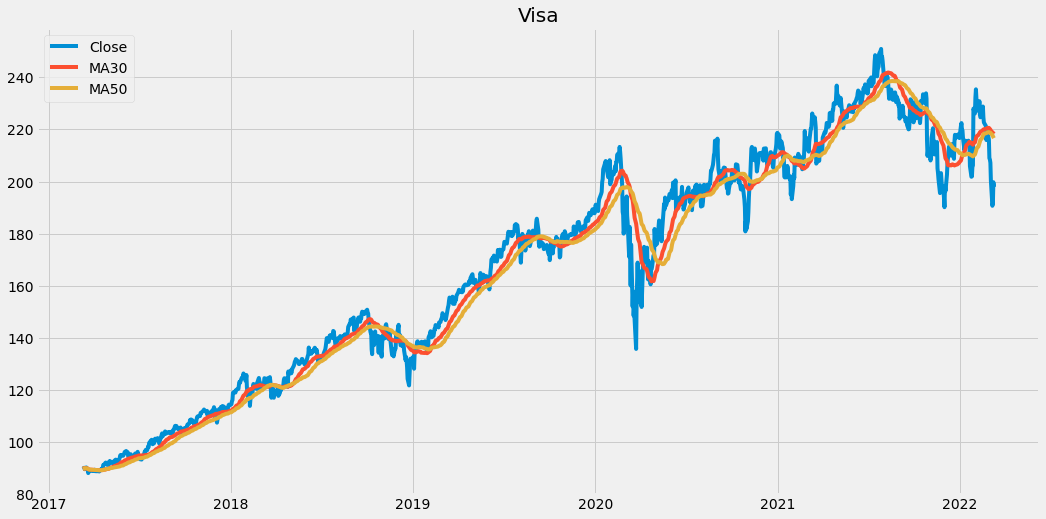

In [168]:
plt.figure(figsize=(16, 8))
plt.title("Visa")
plt.plot(V.index,V['Close'],label="Close")
plt.plot(V.index,V['MovingAvg_30'],label="MA30")
plt.plot(V.index,V['MovingAvg_50'],label="MA50")
plt.legend()

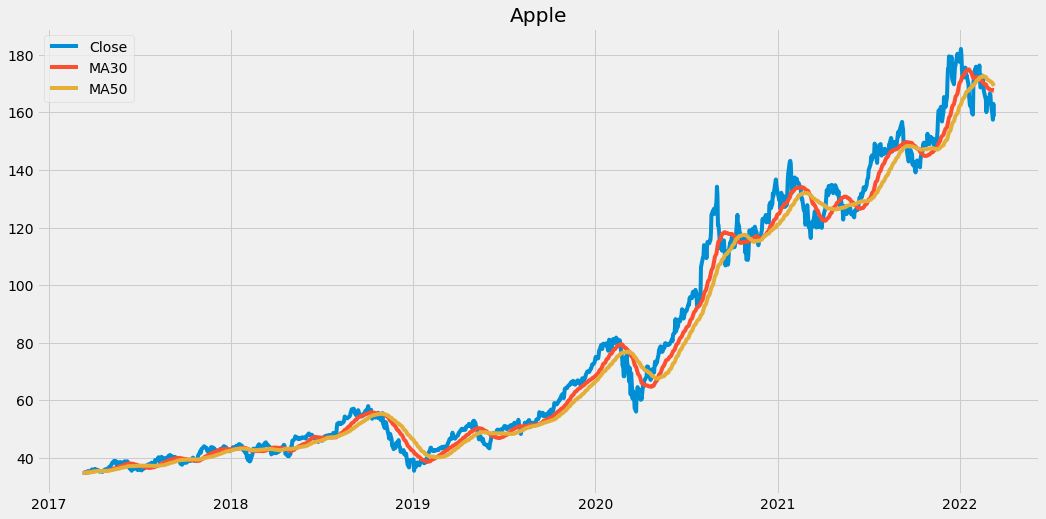

In [169]:
#AAPL
plt.figure(figsize=(16, 8))
plt.title("Apple")
plt.plot(AAPL.index,AAPL['Close'],label="Close")
plt.plot(AAPL.index,AAPL['MovingAvg_30'],label="MA30")
plt.plot(AAPL.index,AAPL['MovingAvg_50'],label="MA50")
plt.legend()

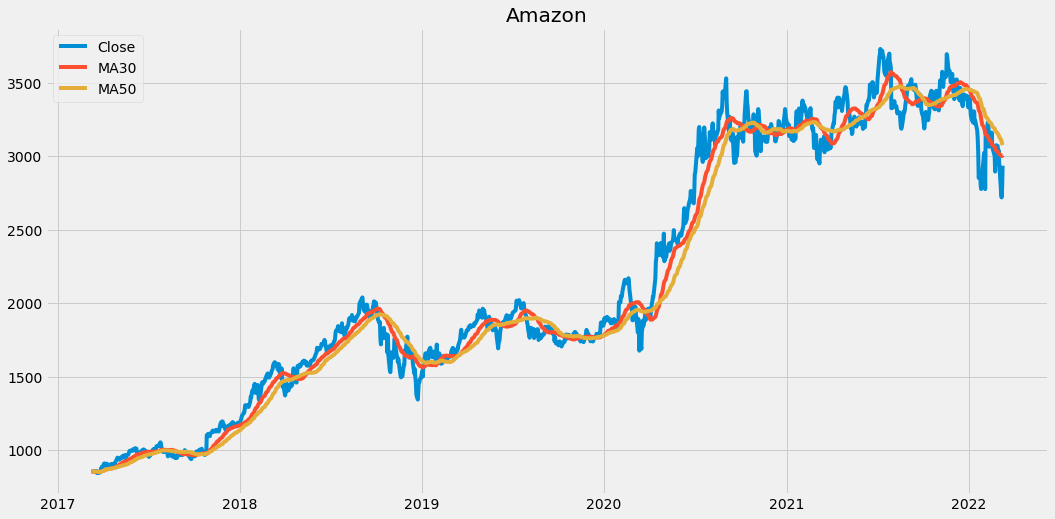

In [170]:
#AMZN
plt.figure(figsize=(16, 8))
plt.title("Amazon")
plt.plot(AMZN.index,AMZN['Close'],label="Close")
plt.plot(AMZN.index,AMZN['MovingAvg_30'],label="MA30")
plt.plot(AMZN.index,AMZN['MovingAvg_50'],label="MA50")
plt.legend()

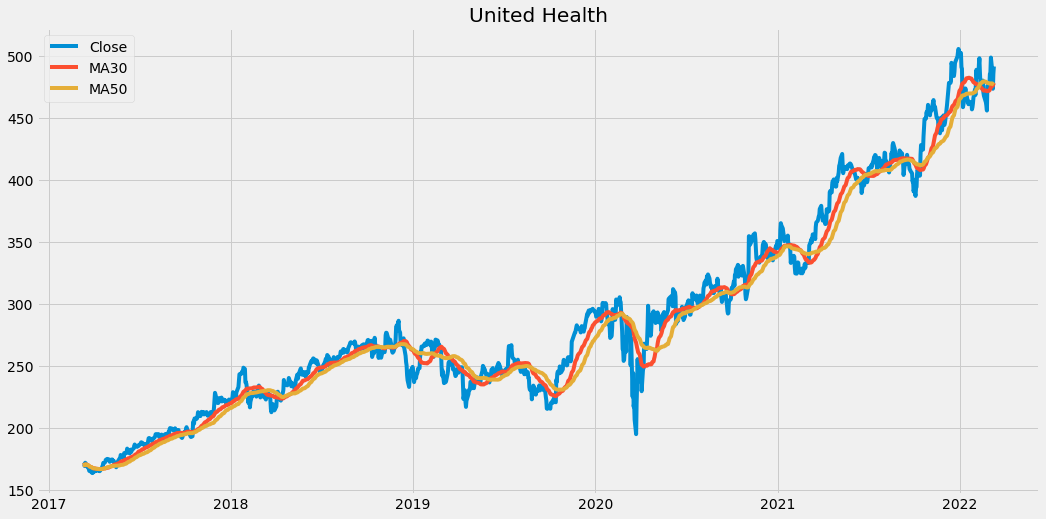

In [171]:
#UNH
plt.figure(figsize=(16, 8))
plt.title("United Health")
plt.plot(UNH.index,UNH['Close'],label="Close")
plt.plot(UNH.index,UNH['MovingAvg_30'],label="MA30")
plt.plot(UNH.index,UNH['MovingAvg_50'],label="MA50")
plt.legend()

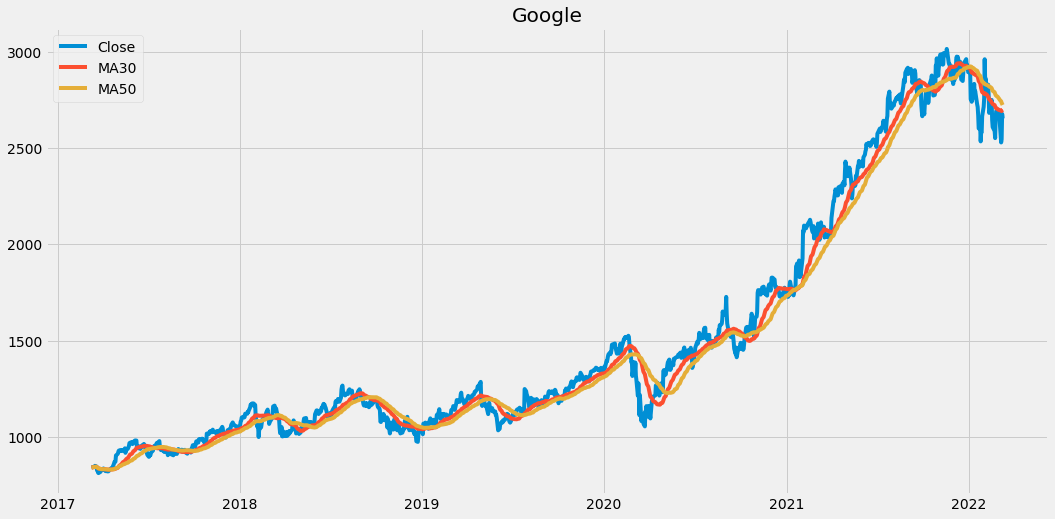

In [172]:
#GOOG
plt.figure(figsize=(16, 8))
plt.title("Google")
plt.plot(GOOG.index,GOOG['Close'],label="Close")
plt.plot(GOOG.index,GOOG['MovingAvg_30'],label="MA30")
plt.plot(GOOG.index,GOOG['MovingAvg_50'],label="MA50")
plt.legend()

In [173]:
#find out which stock can fluctuate the most within a day
print("The biggest price movement in a day")
print()
for data in company_list:
    print(max(data['company_name']))
    print(max(data['High-low']))
    print()

The biggest price movement in a day

APPLE
12.80999755859375

GOOGLE
184.31005859375

AMAZON
275.900146484375

UNITED HEALTH
31.509994506835938

VISA
17.330001831054688



In [174]:
#find out how many % growth in their company since the start of 2017 to end date
print("The % growth from the start to end date")
print()
for data in company_list:
    print(max(data['company_name']))
    print("The change is",((data['Close'].iloc[len(V)-1]-data['Close'].iloc[0])/data['Close'].iloc[0])*100,"%")
    print()

The % growth from the start to end date

APPLE
The change is 355.7136839667237 %

GOOGLE
The change is 214.6919528702194 %

AMAZON
The change is 244.45604743566932 %

UNITED HEALTH
The change is 189.11637533462198 %

VISA
The change is 120.62854543001156 %



In [175]:
#find out how many % growth in their company since the start of 2017 to their highest close price

In [176]:
print("The growth from the start to their peak")
for data in company_list:
    print(max(data['company_name']))
    print("From start to highest increase is",((max(data['Close'])-data['Close'].iloc[0])/data['Close'].iloc[0])*100,"%")
    for i in range(0,len(V)):
        if(data['Close'].iloc[i]==max(data['Close'])):
            print("Days took to hit peak:",i)
            print()
            break

The growth from the start to their peak
APPLE
From start to highest increase is 423.24276356257303 %
Days took to hit peak: 1213

GOOGLE
From start to highest increase is 257.4479610602579 %
Days took to hit peak: 1183

AMAZON
From start to highest increase is 337.7225694965276 %
Days took to hit peak: 1089

UNITED HEALTH
From start to highest increase is 197.43499192849717 %
Days took to hit peak: 1210

VISA
From start to highest increase is 179.6500426703611 %
Days took to hit peak: 1102



In [177]:
for data in company_list:
    print(max(data['company_name']))
    print("Highest Volume",max(data['Volume']))
    print()

APPLE
Highest Volume 426510000

GOOGLE
Highest Volume 6207000

AMAZON
Highest Volume 16565000

UNITED HEALTH
Highest Volume 27361400

VISA
Highest Volume 38379600



In [178]:
lt30Visa =0
lt50Visa =0
#AAPL
lt30Apple=0
lt50Apple=0
#AMZN
lt30Amazon=0
lt50Amazon=0
#UNH
lt30UnitedHealth=0
lt50UnitedHealth=0
#GOOG
lt30Google=0
lt50Google=0
for i in range(0,len(V)-1):
    if(V["Close"].iloc[i] < V['MovingAvg_30'].iloc[i]):
        lt30Visa+=1
    if(V["Close"].iloc[i] < V['MovingAvg_50'].iloc[i]):
        lt50Visa+=1
        
    if(AAPL["Close"].iloc[i] < AAPL['MovingAvg_30'].iloc[i]):
        lt30Apple+=1
    if(AAPL["Close"].iloc[i] < AAPL['MovingAvg_50'].iloc[i]):
        lt50Apple+=1
        
    if(AMZN["Close"].iloc[i] < AMZN['MovingAvg_30'].iloc[i]):
        lt30Amazon+=1
    if(AMZN["Close"].iloc[i] < AMZN['MovingAvg_50'].iloc[i]):
        lt50Amazon+=1
        
    if(UNH["Close"].iloc[i] < UNH['MovingAvg_30'].iloc[i]):
        lt30UnitedHealth+=1
    if(UNH["Close"].iloc[i] < UNH['MovingAvg_50'].iloc[i]):
        lt50UnitedHealth+=1

    if(GOOG["Close"].iloc[i] < GOOG['MovingAvg_30'].iloc[i]):
        lt30Google+=1
    if(GOOG["Close"].iloc[i] < GOOG['MovingAvg_50'].iloc[i]):
        lt50Google+=1
        

print("Total number of days:",len(V))
print()
print("Apple:")
print("Number of days below MA30:", lt30Apple)
print("Number of days below MA50:", lt50Apple)
print()
print("Google:")
print("Number of days below MA30:", lt30Google)
print("Number of days below MA50:", lt50Google)
print()
print("AMAZON:")
print("Number of days below MA30:", lt30Amazon)
print("Number of days below MA50:", lt50Amazon)
print()
print("United Health:")
print("Number of days below MA30:", lt30UnitedHealth)
print("Number of days below MA50:", lt50UnitedHealth)
print()
print("Visa:")
print("Number of days below MA30:", lt30Visa)
print("Number of days below MA50:", lt50Visa)

Total number of days: 1260

Apple:
Number of days below MA30: 407
Number of days below MA50: 352

Google:
Number of days below MA30: 426
Number of days below MA50: 384

AMAZON:
Number of days below MA30: 453
Number of days below MA50: 460

United Health:
Number of days below MA30: 439
Number of days below MA50: 382

Visa:
Number of days below MA30: 388
Number of days below MA50: 336


|-| Apple | Google | Amazon | United Health | Visa|
|-----|-----|-----|-----|-----|-----|
|# days < MA30|407|426|453|439|388|
|-----|-----|-----|-----|-----|-----|
|#days < MA50 |352|284|460|382|336|
|-----|-----|-----|-----|-----|-----|
|Max Vol Trade in 1 day|426,510,000|6,207,000|16,565,000|27,361,400|38,379,600|
|-----|-----|-----|-----|-----|-----|
|Growth from start to end| 355%| 214%|244%|189%|120%|
|-----|-----|-----|-----|-----|-----|
|Growth from start to peak|423%|257%|337%|197%|179%|
|Days taken to reach peak|1213|1183|1089|1210|1102|
|-----|-----|-----|-----|-----|-----|
|Biggest price movement|12|184|275|31|17|

### From the EDA observations we have decided to choose to predict the stock prices for Apple. As it has the highest growth, while having little price fluctuation in a Day. Its support from its moving averages is also one of the lowest among the 5 stocks. While having the highest trade volume as compared to the others.

In [179]:
chosen_data = AAPL

# FROM HERE TO LSTM DO U GUYS THINK WE SHOULD INCORPORATE IT ? BECAUSE AH I ALREADY ADDED THOSE OPEN-HIGH COLUMNS ON TOP. IF WANT CAN ADD ON TOP I GUESS BUT IDK HOW TO FLOW HEHEHE

In [181]:
sns.heatmap(tesla_df.corr(), annot = True,vmin=-1, vmax=1)

### Large number of 1s and values close to 1 as variables show high positive correlations and are interrelated. This might be because of the minute difference between those values. However, in reality these small values play a huge role 

In [51]:
# Transform data to include useful columns to use later on
tesla_data['Open-high'] = tesla_data['Open']-tesla_data['High']
tesla_data['Open-low'] = tesla_data['Open'] - tesla_data['Low']
tesla_data['Close-high'] = tesla_data['Close']-tesla_data['High']
tesla_data['Close-low'] = tesla_data['Close'] - tesla_data['Low']
tesla_data['High-low'] = tesla_data['High'] - tesla_data['Low']
tesla_data['Open-close'] = tesla_data['Open'] - tesla_data['Close']


In [52]:
print(len(tesla_data))
tesla_data['DateTime'] = tesla_data.index
tesla_data['New_ID'] = range(1, 1+len(tesla_data))
tesla_data.index = tesla_data['New_ID']
tesla_data= tesla_data.drop(['New_ID'],axis=1)
ma_day = [30, 50]
for ma in ma_day:
    column_name = f"MovingAvg_{ma}"
    tesla_data[column_name] = tesla_data['Close'].rolling(ma).mean()
print(len(tesla_data))
for ma in ma_day:
    column_name = f"MovingAvg_{ma}"
    column_df = pd.DataFrame(tesla_data[column_name])
    date = datetime(2021, 3, 10)
    for day in range(1,ma+1):
        _ = tesla_data.head(day)['Close']
        avg = sum(_)/(day)
        tesla_data.at[day,column_name] = avg
        


# tesla_data.index = [i for i in range(1,255)]
print(len(tesla_data))
tesla_data.index = tesla_data['DateTime'] #change back index to date time for ML 
tesla_data= tesla_data.drop(['DateTime'],axis=1) #drop
tesla_data.head(10)
# tesla_data.tail(10)

#         print(avg)
#         tesla_data[column_name] = tesla_data[column_name].replace(np.nan, avg)
# tesla_data.head(30)

1260
1260
1260


Open       High        Low      Close  Adj Close    Volume  \
DateTime                                                                      
2017-03-10  49.242001  49.299999  48.599998  48.737999  48.737999  15331500   
2017-03-13  48.964001  49.369999  48.556000  49.234001  49.234001  15113000   
2017-03-14  49.222000  51.624001  49.203999  51.599998  51.599998  37992000   
2017-03-15  51.400002  52.200001  50.854000  51.146000  51.146000  26654000   
2017-03-16  52.480000  53.150002  51.812000  52.410000  52.410000  35661000   
2017-03-17  52.799999  53.066002  52.240002  52.299999  52.299999  32487500   
2017-03-20  52.119999  52.910000  51.764000  52.383999  52.383999  18071500   
2017-03-21  52.566002  52.959999  50.048000  50.136002  50.136002  34543000   
2017-03-22  50.312000  51.014000  50.102001  51.001999  51.001999  20296500   
2017-03-23  51.077999  51.534000  50.660000  50.956001  50.956001  16601000   

           company_name  Open-high  Open-low  Close-high  Close-low  High-low  \
DateTime                                                                        
2017-03-10        TESLA  -0.057999  0.642002   -0.562000   0.138000  0.700001   
2017-03-13        TESLA  -0.405998  0.408001   -0.135998   0.678001  0.813999   
2017-03-14        TESLA  -2.402000  0.018002   -0.024002   2.396000  2.420002   
2017-03-15        TESLA  -0.799999  0.546001   -1.054001   0.292000  1.346001   
2017-03-16        TESLA  -0.670002  0.667999   -0.740002   0.598000  1.338001   
2017-03-17        TESLA  -0.266003  0.559998   -0.766003   0.059998  0.826000   
2017-03-20        TESLA  -0.790001  0.355999   -0.526001   0.619999  1.146000   
2017-03-21        TESLA  -0.393997  2.518002   -2.823997   0.088001  2.911999   
2017-03-22        TESLA  -0.702000  0.209999   -0.012001   0.899998  0.911999   
2017-03-23        TESLA  -0.456001  0.417999   -0.577999   0.296001  0.874001   

            Open-close  MovingAvg_30  MovingAvg_50  
DateTime                                            
2017-03-10    0.504002     48.737999     48.737999  
2017-03-13   -0.270000     48.986000     48.986000  
2017-03-14   -2.377998     49.857333     49.857333  
2017-03-15    0.254002     50.179500     50.179500  
2017-03-16    0.070000     50.625600     50.625600  
2017-03-17    0.500000     50.904666     50.904666  
2017-03-20   -0.264000     51.115999     51.115999  
2017-03-21    2.430000     50.993500     50.993500  
2017-03-22   -0.689999     50.994444     50.994444  
2017-03-23    0.121998     50.990600     50.990600

<AxesSubplot:>

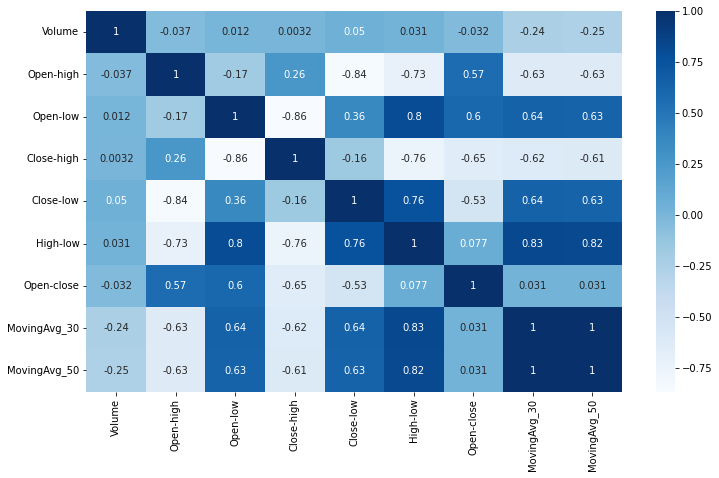

In [53]:
# drop old useless columns
tesla_transform_data = tesla_data.copy()
tesla_transform_data = tesla_transform_data.drop(['Open','High','Low','Close', 'Adj Close'],axis=1)
tesla_transform_df = pd.DataFrame(tesla_transform_data)
tesla_transform_df.head()
plt.figure(figsize=(12,7))
sns.heatmap(tesla_transform_df.corr(),cmap='Blues',annot=True)

<AxesSubplot:xlabel='High-low', ylabel='Volume'>

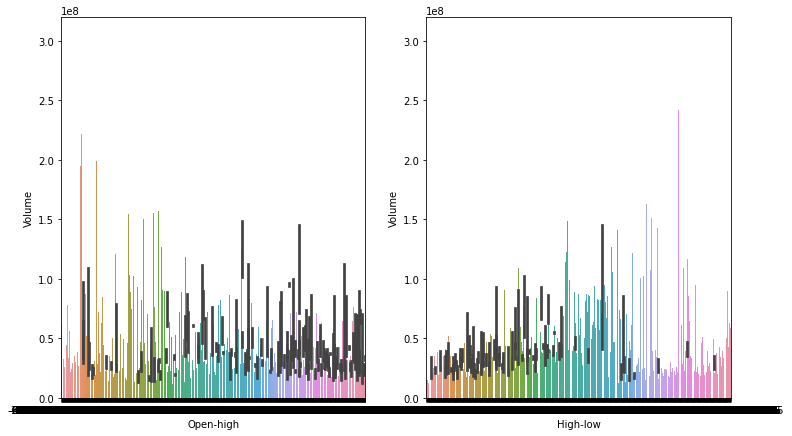

In [54]:
f, axes = plt.subplots(1, 2, figsize=(12,7))

# count = 0
# for var in numeric_df:
#     sb.boxplot(data = numeric_df[var], orient = "h", ax = axes[count,0])
#     sb.histplot(data = numeric_df[var], ax = axes[count,1])
#     sb.violinplot(data = numeric_df[var], orient = "h", ax = axes[count,2])
#     count += 1
sns.barplot(data=tesla_transform_df, x = "Open-high", y="Volume", ax=axes[0])
sns.barplot(data=tesla_transform_df, x = "High-low", y="Volume", ax=axes[1])

In [205]:
plt.style.use('fivethirtyeight')

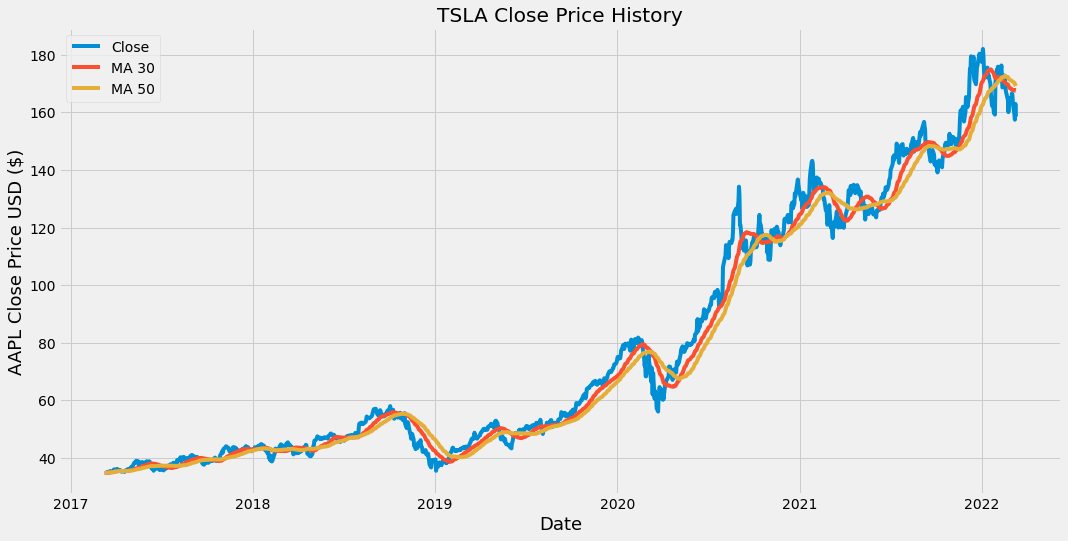

In [208]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title("TSLA Close Price History")
plt.xlabel('Date',fontsize=18)
plt.ylabel("AAPL Close Price USD ($)",fontsize=18)

plt.plot(chosen_data['Close'],label = "Close Price")
plt.plot(chosen_data['MovingAvg_30'],label ="MA 30")
plt.plot(chosen_data['MovingAvg_50'],label ="MA 50")
plt.legend(['Close','MA 30','MA 50'])
plt.show()

## LSTM, Step 1: Preparation of Hyperparameter LSTM functions

In [209]:
def getLSTMTrainData(predictionDays: int, scaled_data, trainLength:int):
    train_data = scaled_data[0:trainLength, :]
    #Split the data into x_train and y_train data sets
    #Independent training variable, list of 60 closing prices that is going to be used to predict next day closing price in y_train
    x_train, y_train = [], []
    #Dependent training variable, list of next day closing prices corresponding to each list in x_train to be predicted by LSTM
    #Append past 60 values of the train_data
    for i in range(predictionDays, trainLength):
        x_train.append(train_data[i-predictionDays:i, 0]) 
        y_train.append(train_data[i,0]) 
    x_train, y_train = np.array(x_train), np.array(y_train)
    # reshape as LSTM requires 3d array
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    return x_train, y_train

In [210]:
def trainLSTMHyper(x_train, y_train, x_test, hiddenNeurons, denseSize, batchSize, epochNo):
    #Building the LSTM model
    model = Sequential()
    #First LSTM layer, giving it hiddenNeurons neurons and return_sequences=True as we need to add another LSTM layer
    model.add(LSTM(hiddenNeurons, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    #Second LSTM layer
    model.add(LSTM(hiddenNeurons, return_sequences=False))
    #Dense layer with denseSize neurons
    model.add(Dense(denseSize))
    #Dense layer with 1 neuron
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(x_train, y_train, batch_size=batchSize, epochs=epochNo)
    predicted = model.predict(x_test)
    return predicted

In [211]:
def getLSTMTestData(prediction_days:int, dataset, scaled_data, trainLength:int):
    #Creating new array contained scaled values 
    test_data = scaled_data[trainLength - prediction_days: , :]
    x_test = []
    y_test = dataset[trainLength: , :] #Containing values our model want to predict
    for i in range(prediction_days, len(test_data)):
        x_test.append(test_data[i-prediction_days:i,0])#Append the past 60 values to test dataset
    #Converting into numpy array to use in LSTM model
    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
    return x_test, y_test

In [212]:
def evalPredicted(predicted, actual, modelName):
    # RMSE = np.sqrt(((predicted - actual) ** 2).mean())
    # R2 = met.r2_score(actual,predicted)
    MSE = met.mean_squared_error(actual, predicted)
    RMSE = math.sqrt(MSE)
    R2 = met.r2_score(actual,predicted)
    print('{modelName} Root Mean Squared Error is {rmse}'.format(modelName=modelName,rmse=RMSE))
    print('{modelName} R Squared is {r2}'.format(modelName=modelName,r2=R2))
    return RMSE, R2

In [213]:
def plotModelResult(closingPrices, trainLength, predicted, name):
    #Plot the data
    #train = closingPrices[:trainLength] # no need ?
    data = closingPrices[trainLength:]
    data['Predicted']=predicted
    data.rename(columns={'Close':'Actual'},inplace = True)
    #Visualise the model
    plt.figure(figsize=(16,8))
    plt.title("{name} Close Price".format(name=name))
    plt.xlabel('Date',fontsize=18)
    plt.ylabel("{name} Close Price USD ($)".format(name=name,fontsize=18))
    #plt.plot(train['Close']) 
    plt.plot(data[['Actual','Predicted']])
    plt.legend(['Actual Price','Predicted Price'])

In [214]:
def getLSTMTrainLength(data):
    closingPrices = data.filter(['Close'])
    dataset = closingPrices.values
    trainLength = math.ceil(len(dataset)*.8) #Math.ceil to round up
    return trainLength

In [215]:
def runLSTMHyper(data, stockName, trainLength, hiddenNeurons, denseSize, batchSize, epochNo, predictionDays):
    """
    @input (data: df/df-like data of one stock, stockName: string of that stock)
    @output RMSE value of predicted against actual Values
    """
    closingPrices = data.filter(['Close'])
    dataset = closingPrices.values
    #Scale the data
    scaler = MinMaxScaler(feature_range=(0,1))
    #Computes min and max value to be used for scaling, then transforms the data based on the min max values
    scaled_data = scaler.fit_transform(dataset)
    #Create the training data set
    x_train, y_train = getLSTMTrainData(predictionDays, scaled_data, trainLength)
    x_test, y_test = getLSTMTestData(predictionDays, dataset, scaled_data, trainLength)
    predicted = trainLSTMHyper(x_train, y_train, x_test, hiddenNeurons, denseSize, batchSize, epochNo)
    predicted = scaler.inverse_transform(predicted)
    #plotModelResult(closingPrices, trainLength, predicted, stockName) #transferred to Step 3
    RMSE, R2 = evalPredicted(predicted, y_test, "LSTM")
    LSTM = data[trainLength:]
    LSTM['Predicted']=predicted
    LSTM.rename(columns={'Close':'Actual'},inplace = True)
    return RMSE, R2, LSTM

In [216]:
def getBestLSTM(LSTMRmseAll):
    minRMSE = LSTMRmseAll['RMSE'].min()
    minRMSERow = LSTMRmseAll['RMSE'].idxmin()
    bestLSTM = LSTMRmseAll.loc[minRMSERow,'LSTM']
    maxR2 = LSTMRmseAll['R^2'].max()
    return minRMSE, minRMSERow, bestLSTM, maxR2

In [217]:
def getBestHyperparameters(LSTMRmseAll):
    bestHiddenNeurons = LSTMRmseAll.iloc[minRMSERow,0]
    bestDenseSize = LSTMRmseAll.iloc[minRMSERow,1]
    bestPredictionDays = LSTMRmseAll.iloc[minRMSERow,2]
    bestEpochNo = LSTMRmseAll.iloc[minRMSERow,3]
    bestBatchSize = LSTMRmseAll.iloc[minRMSERow,4]
    return bestHiddenNeurons, bestDenseSize, bestPredictionDays, bestEpochNo, bestBatchSize

In [218]:
def getWorstLSTM(LSTMRmseAll):
    maxRMSE = LSTMRmseAll['RMSE'].max()
    maxRMSERow = LSTMRmseAll['RMSE'].idxmax()
    worstLSTM = LSTMRmseAll.loc[maxRMSERow,'LSTM']
    minR2 = LSTMRmseAll['R^2'].min()
    return maxRMSE, maxRMSERow, worstLSTM, minR2

In [219]:
def getStockDf(stockName):
    """
    @input (stockName: string of that stock)
    @output df/df-like data of one stock
    """
    stockDf = globals()[stockName]
    return stockDf

## LSTM, Step 2: Running Hyperameter Tuning (ONLY RUN ONCE, data is written into Hyperparamter_Tuning.csv file)

In [222]:
data = chosen_data
trainLength = getLSTMTrainLength(data)

LSTMRmseAll = pd.DataFrame(columns=['hiddenNeurons','denseSize', 'predictionDays', 'epochNo', 'batchSize'])

#For testing, currently training 1x1x1x1x3 = 3 times
hiddenNeurons = [80] #For testing, pick any 1 out of [20, 40, 60, 80, 100]
denseSize = [50] #For testing, pick any 1 out of [25, 50]
batchSize = [32] #For testing, pick any 1 out of [32, 64, 128]
epochNo = [1] #For testing, pick any 1 out of [50, 100, 150]
predictionDays = [55, 60, 65] #For testing, pick any 3 out of [55, 60, 65]
#For actual, will be training 5x2x3x3x3 = 270 times (do at lab btr?)

for neurons in hiddenNeurons:
    for dense in denseSize:
        for prediction in predictionDays:
            for epoch in epochNo:
                for batch_size in batchSize:
                    from keras.layers import Dense, LSTM, Dropout #ok damn stupid to include here but if dont theres error
                    LstmRMSE, LstmR2, LSTM = runLSTMHyper(data, "TSLA", trainLength, neurons, dense, batch_size, epoch, prediction)
                    tempDF = pd.DataFrame([[neurons, dense, prediction, epoch, batch_size, LstmRMSE, LstmR2, LSTM[['Actual','Predicted']]]],
                    columns=['hiddenNeurons','denseSize', 'predictionDays', 'epochNo', 'batchSize', 'RMSE', 'R^2', 'LSTM'])
                    LSTMRmseAll = pd.concat([LSTMRmseAll, tempDF], ignore_index=True)

LSTMRmseAll.to_csv('Hyperparameter_Tuning.csv')

30/30 [==============================] - 4s 36ms/step - loss: 0.0085
LSTM Root Mean Squared Error is 6.3304170633279
LSTM R Squared is 0.8581041637556774


C:\Users\Alex\AppData\Local\Temp\ipykernel_16756\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Alex\AppData\Local\Temp\ipykernel_16756\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



30/30 [==============================] - ETA: 0s - loss: 0.009 - 5s 39ms/step - loss: 0.0096
LSTM Root Mean Squared Error is 12.558791066888654
LSTM R Squared is 0.4415289360585989


C:\Users\Alex\AppData\Local\Temp\ipykernel_16756\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Alex\AppData\Local\Temp\ipykernel_16756\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



30/30 [==============================] - 5s 43ms/step - loss: 0.0092
LSTM Root Mean Squared Error is 12.895780517390941
LSTM R Squared is 0.4111559771510954


C:\Users\Alex\AppData\Local\Temp\ipykernel_16756\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Alex\AppData\Local\Temp\ipykernel_16756\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [223]:
#this dataframe currently has LSTM so that we can extract the best LSTM dataframe for further analysis (if needed)
LSTMRmseAll

hiddenNeurons denseSize predictionDays epochNo batchSize       RMSE  \
0            80        50             55       1        32   6.330417   
1            80        50             60       1        32  12.558791   
2            80        50             65       1        32  12.895781   

        R^2                                               LSTM  
0  0.858104                  Actual   Predicted
DateTime   ...  
1  0.441529                  Actual   Predicted
DateTime   ...  
2  0.411156                  Actual   Predicted
DateTime   ...

In [224]:
minRMSE, minRMSERow, bestLSTM, maxR2 = getBestLSTM(LSTMRmseAll)
print("Smallest RMSE is " + str(minRMSE) + " and best R^2 is "+ str(maxR2) + " located at Row " + str(minRMSERow))
LSTMRmseAll.iloc[[minRMSERow]]

Smallest RMSE is 6.3304170633279 and best R^2 is 0.8581041637556774 located at Row 0


hiddenNeurons denseSize predictionDays epochNo batchSize      RMSE  \
0            80        50             55       1        32  6.330417   

        R^2                                               LSTM  
0  0.858104                  Actual   Predicted
DateTime   ...

In [225]:
maxRMSE, maxRMSERow, worstLSTM, minR2 = getWorstLSTM(LSTMRmseAll)
print("Largest RMSE is " + str(maxRMSE) + " and best R^2 is "+ str(minR2) + " located at Row " + str(maxRMSERow))
LSTMRmseAll.iloc[[maxRMSERow]]

Largest RMSE is 12.895780517390941 and best R^2 is 0.4111559771510954 located at Row 2


hiddenNeurons denseSize predictionDays epochNo batchSize       RMSE  \
2            80        50             65       1        32  12.895781   

        R^2                                               LSTM  
2  0.411156                  Actual   Predicted
DateTime   ...

In [226]:
print("The difference between the best and worst combinations of LSTM hyperparameters for RMSE and R^2 respectively are:\nRMSE: "+str(maxRMSE-minRMSE)+", R^2: "+str(maxR2-minR2)+"\nClearly, Hyperparameter Tuning has significantly helped our LSTM model select the best combinations of hyperparameters.")

The difference between the best and worst combinations of LSTM hyperparameters for RMSE and R^2 respectively are:
RMSE: 6.565363454063041, R^2: 0.446948186604582
Clearly, Hyperparameter Tuning has significantly helped our LSTM model select the best combinations of hyperparameters.


In [228]:
#Defining test and train data sizes
train_size = int(len(data)*0.80)
test_size = len(data) - train_size
train_size, test_size

(1008, 252)

In [230]:
Dateholder = pd.DataFrame(chosen_data['Close'])
Dateholder = Dateholder[train_size:]
bestLSTM.index = Dateholder.index

In [244]:
bestLSTM.to_csv("Predicted_Naive.csv")
bestLSTM

Actual   Predicted
DateTime                          
2021-03-12  121.029999  121.801811
2021-03-15  123.989998  121.345596
2021-03-16  125.570000  121.078529
2021-03-17  124.760002  121.009453
2021-03-18  120.529999  121.043297
...                ...         ...
2022-03-04  163.169998  163.428467
2022-03-07  159.300003  163.099838
2022-03-08  157.440002  162.615616
2022-03-09  162.949997  161.977020
2022-03-10  158.520004  161.467529

[252 rows x 2 columns]

In [242]:
bestHiddenNeurons, bestDenseSize, bestPredictionDays, bestEpochNo, bestBatchSize = getBestHyperparameters(LSTMRmseAll)

print("The best hyperparameters are:\nbestHiddenNeurons =",bestHiddenNeurons,"\nbestDenseSize =",
      bestDenseSize,"\nbestPredictionDays =",bestPredictionDays,"\nbestEpochNo =",bestEpochNo,"\nbestBatchSize =",bestBatchSize)

The best hyperparameters are:
bestHiddenNeurons = 80 
bestDenseSize = 50 
bestPredictionDays = 55 
bestEpochNo = 1 
bestBatchSize = 32


In [247]:
#Only run this line in LSTM, Step 2:
bestHiddenNeurons, bestDenseSize, bestPredictionDays, bestEpochNo, bestBatchSize = 80, 50, 60, 100, 32

## LSTM, Step 3: Naive Algorithm_Graphical representation of 80% train & 20% test on the best combination of hyperparameters resulting in best LSTM model

In [83]:
def plotModelResultNAIVE(bestLSTM, name):
    plt.figure(figsize=(16,8))
    plt.title("{name} Close Price".format(name=name))
    plt.xlabel('Date',fontsize=18)
    plt.ylabel("{name} Close Price USD ($)".format(name=name,fontsize=18))
    plt.plot(bestLSTM[['Actual','Predicted']])
    plt.legend(['Actual Price','Predicted Price'])

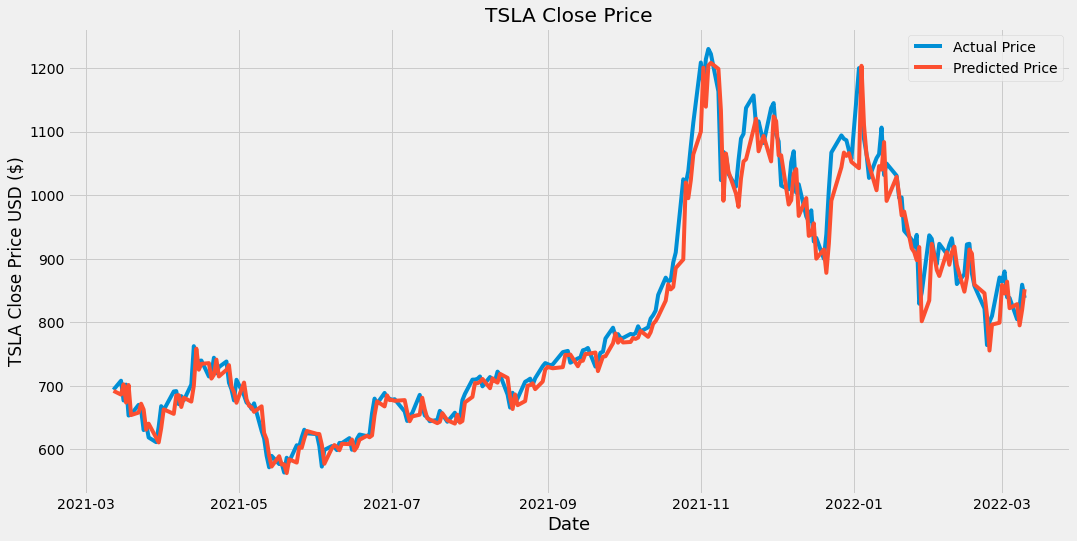

In [84]:
plotModelResultNAIVE(bestLSTM, "TSLA")

## LSTM, Step 4: Sliding Window Algorithm

#### In "LSTM, Step 2: Running Hyperparameter Tuning", we are obviously using a naive LSTM algorithm to predict 20% of test data. A proper LSTM algorithm for stock price prediction should be using the past X days of stock price data to predict 1 day into the future. Hence, we are now modifying our naive LSTM algorithm to get 60 days of stock price prediction, however we are now running our model 60 times, and each time it runs, we are appending the actual stock price of the present day to the training data while removing the oldest stock price from the training data to predict the next day stock price. In this way, the past X days of stock price data to predict 1 day into the future always remains the same. We are going to use a sliding window algorithm of stride 1.

### Re-defining LSTM functions for Sliding Window Algorithm

In [245]:
#Added cause skipped the hyperparameter tuning
data = chosen_data
trainLength = getLSTMTrainLength(data)

In [180]:
#Re-training the LSTM model with best hyperparameters, this time out of function otherwise model.predict wont work subsequently
from tensorflow.keras.layers import Dense, LSTM, Dropout 

closingPrices = data.filter(['Close'])
dataset = closingPrices.values
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:trainLength, :]
x_train, y_train = [], []
for i in range(bestPredictionDays, trainLength):
    x_train.append(train_data[i-bestPredictionDays:i, 0]) 
    y_train.append(train_data[i,0]) 
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

test_data = scaled_data[trainLength - bestPredictionDays: , :]
x_test = []
y_test = dataset[trainLength: , :] 
for i in range(bestPredictionDays, len(test_data)):
    x_test.append(test_data[i-bestPredictionDays:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

model = Sequential()
model.add(LSTM(bestHiddenNeurons, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(bestHiddenNeurons, return_sequences=False))
model.add(Dense(bestDenseSize))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=bestBatchSize, epochs=bestEpochNo)
predicted = model.predict(x_test)
predicted = scaler.inverse_transform(predicted)

LSTM_RMSE_NAIVE, LSTM_R2_NAIVE = evalPredicted(predicted, y_test, "LSTM")
LSTM = data[trainLength:]
LSTM['Predicted']=predicted
LSTM.rename(columns={'Close':'Actual'},inplace = True)

Epoch 1/100
19/19 [==============================] - 5s 49ms/step - loss: 0.0095
Epoch 2/100
19/19 [==============================] - 1s 54ms/step - loss: 9.1345e-04
Epoch 3/100
19/19 [==============================] - 1s 53ms/step - loss: 6.6097e-04
Epoch 4/100
19/19 [==============================] - 1s 48ms/step - loss: 4.9287e-04
Epoch 5/100
19/19 [==============================] - 1s 55ms/step - loss: 4.0283e-04
Epoch 6/100
19/19 [==============================] - 1s 64ms/step - loss: 3.7571e-04
Epoch 7/100
19/19 [==============================] - 1s 55ms/step - loss: 3.4937e-04
Epoch 8/100
19/19 [==============================] - 1s 53ms/step - loss: 3.3228e-04
Epoch 9/100
19/19 [==============================] - 1s 60ms/step - loss: 2.8998e-04
Epoch 10/100
19/19 [==============================] - 1s 57ms/step - loss: 3.1924e-04
Epoch 11/100
19/19 [==============================] - 1s 55ms/step - loss: 3.0472e-04
Epoch 12/100
19/19 [==============================] - 1s 51ms/step 

C:\Users\axati\AppData\Local\Temp\ipykernel_19968\321234557.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LSTM['Predicted']=predicted
C:\Users\axati\AppData\Local\Temp\ipykernel_19968\321234557.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LSTM.rename(columns={'Close':'Actual'},inplace = True)


In [181]:
#Splitting data between train and test
ds_train, ds_test = scaled_data[0:train_size,:], scaled_data[train_size:len(scaled_data),:1]
len(ds_train),len(ds_test)

#Getting the last predictionDays records from train dataset to predict 1 day in advanced in test dataset
#fut_inp should initially consist of the last predictionDays of stock data from train dataset
fut_inp = ds_train[(len(ds_train)-bestPredictionDays):]
fut_inp = fut_inp.reshape(1,-1)
tmp_inp = list(fut_inp)
tmp_inp = tmp_inp[0].tolist()

In [182]:
#Added this to test fitting 
trainLengthSliding = trainLength
x_train.shape

In [185]:
#Predicting next len(ds_test) days price using the current data
#It will predict in sliding window manner (algorithm) with stride 1

lst_output=[]
n_steps=bestPredictionDays
k=0
test=0

#print("Original tmp_inp:\n"+str(tmp_inp))

#while(i<len(ds_test)):
while(k<30): #We want to predict 5 days, also need to change epoch to 100
    #print("Start of loop: len(tmp_inp) = "+str(len(tmp_inp)))
    print("Set "+str(k)) #To remove this, just checking
    if(len(tmp_inp)>bestPredictionDays):
        fut_inp = np.array(tmp_inp[1:])
        fut_inp=fut_inp.reshape(1,-1)
        fut_inp = fut_inp.reshape((1, n_steps, 1))
        yhat = model.predict(fut_inp)
        #print("\nPredicted value: ")
        #print(yhat)
        #print("\n")
        new_actual = ds_test[test]
        tmp_inp.extend(new_actual)
        #tmp_inp.extend(yhat[0].tolist()) #change this
        tmp_inp = tmp_inp[1:]
        lst_output.extend(yhat.tolist())
        
        #The appending logic
        trainLengthSliding = trainLengthSliding+1
        train_data_sliding = scaled_data[0:trainLengthSliding, :]
        x_train_sliding, y_train_sliding = [], []
        for i in range(bestPredictionDays, trainLengthSliding):
            x_train_sliding.append(train_data_sliding[i-bestPredictionDays:i, 0]) 
            y_train_sliding.append(train_data_sliding[i,0]) 
        x_train_sliding, y_train_sliding = np.array(x_train_sliding), np.array(y_train_sliding)
        x_train_sliding = np.reshape(x_train_sliding, (x_train_sliding.shape[0], x_train_sliding.shape[1], 1))
        print("x_train_sliding.shape = "+str(x_train_sliding.shape))
        model.fit(x_train_sliding, y_train_sliding, batch_size=bestBatchSize, epochs=bestEpochNo)
        #End of appending logic
        k=k+1
        test=test+1
        #print("New tmp_inp:\n"+str(tmp_inp)+"\n")
        
    else:
        fut_inp = fut_inp.reshape((1, n_steps,1))
        yhat = model.predict(fut_inp)
        #print("\nPredicted value: ")
        #print(yhat)
        #print("\n")
        new_actual = ds_test[test]
        tmp_inp.extend(new_actual)
        #tmp_inp.extend(yhat[0].tolist()) #change this
        lst_output.extend(yhat.tolist())

        #The appending logic
        trainLengthSliding = trainLengthSliding+1
        train_data_sliding = scaled_data[0:trainLengthSliding, :]
        x_train_sliding, y_train_sliding = [], []
        for i in range(bestPredictionDays, trainLengthSliding):
            x_train_sliding.append(train_data_sliding[i-bestPredictionDays:i, 0]) 
            y_train_sliding.append(train_data_sliding[i,0]) 
        x_train_sliding, y_train_sliding = np.array(x_train_sliding), np.array(y_train_sliding)
        x_train_sliding = np.reshape(x_train_sliding, (x_train_sliding.shape[0], x_train_sliding.shape[1], 1))
        print("x_train_sliding.shape = "+str(x_train_sliding.shape))
        model.fit(x_train_sliding, y_train_sliding, batch_size=bestBatchSize, epochs=bestEpochNo) 
        #End of appending logic
        k=k+1
        test=test+1
        #print("New tmp_inp:\n"+str(tmp_inp)+"\n")

Set 0
Epoch 1/2
19/19 [==============================] - 1s 55ms/step - loss: 1.3092e-04
Epoch 2/2
19/19 [==============================] - 1s 49ms/step - loss: 1.2005e-04
Set 1
Epoch 1/2
19/19 [==============================] - 1s 50ms/step - loss: 1.1278e-04
Epoch 2/2
19/19 [==============================] - 1s 48ms/step - loss: 1.0496e-04
Set 2
Epoch 1/2
19/19 [==============================] - 1s 48ms/step - loss: 1.0777e-04
Epoch 2/2
19/19 [==============================] - 1s 49ms/step - loss: 1.0688e-04
Set 3
Epoch 1/2
19/19 [==============================] - 1s 52ms/step - loss: 1.2864e-04
Epoch 2/2
19/19 [==============================] - 1s 52ms/step - loss: 1.3096e-04
Set 4
Epoch 1/2
19/19 [==============================] - 1s 54ms/step - loss: 1.2154e-04
Epoch 2/2
19/19 [==============================] - 2s 95ms/step - loss: 1.1205e-04
Set 5
Epoch 1/2
19/19 [==============================] - 2s 91ms/step - loss: 1.1429e-04
Epoch 2/2
19/19 [==============================] - 

Set 59
Epoch 1/2
19/19 [==============================] - 2s 128ms/step - loss: 1.1389e-04
Epoch 2/2
19/19 [==============================] - 2s 128ms/step - loss: 1.0614e-04
Set 60
Epoch 1/2
19/19 [==============================] - 2s 130ms/step - loss: 1.2111e-04
Epoch 2/2
19/19 [==============================] - 2s 127ms/step - loss: 9.8481e-05
Set 61
Epoch 1/2
19/19 [==============================] - 2s 132ms/step - loss: 9.1264e-05
Epoch 2/2
19/19 [==============================] - 3s 147ms/step - loss: 9.9961e-05
Set 62
Epoch 1/2
19/19 [==============================] - 2s 127ms/step - loss: 1.0227e-04
Epoch 2/2
19/19 [==============================] - 2s 126ms/step - loss: 1.2303e-04
Set 63
Epoch 1/2
19/19 [==============================] - 2s 125ms/step - loss: 1.1919e-04
Epoch 2/2
19/19 [==============================] - 2s 129ms/step - loss: 9.4445e-05
Set 64
Epoch 1/2
19/19 [==============================] - 3s 132ms/step - loss: 1.1769e-04
Epoch 2/2
19/19 [=================

19/19 [==============================] - 3s 150ms/step - loss: 9.6240e-05
Epoch 2/2
19/19 [==============================] - 3s 157ms/step - loss: 1.1216e-04
Set 116
Epoch 1/2
19/19 [==============================] - 4s 233ms/step - loss: 1.0321e-04
Epoch 2/2
19/19 [==============================] - 4s 186ms/step - loss: 1.2248e-04
Set 117
Epoch 1/2
19/19 [==============================] - 4s 202ms/step - loss: 9.2790e-05 1s - loss: 6
Epoch 2/2
19/19 [==============================] - 3s 163ms/step - loss: 9.6826e-05
Set 118
Epoch 1/2
19/19 [==============================] - 3s 146ms/step - loss: 8.7331e-05
Epoch 2/2
19/19 [==============================] - 3s 178ms/step - loss: 1.2111e-04
Set 119
Epoch 1/2
19/19 [==============================] - 3s 174ms/step - loss: 9.1541e-05
Epoch 2/2
19/19 [==============================] - 4s 207ms/step - loss: 1.0151e-04
Set 120
Epoch 1/2
19/19 [==============================] - 3s 153ms/step - loss: 1.1137e-04
Epoch 2/2
19/19 [================

19/19 [==============================] - 2s 100ms/step - loss: 9.7242e-05
Set 165
Epoch 1/2
19/19 [==============================] - 2s 91ms/step - loss: 1.0810e-04
Epoch 2/2
19/19 [==============================] - 2s 90ms/step - loss: 1.1401e-04
Set 166
Epoch 1/2
19/19 [==============================] - 2s 84ms/step - loss: 1.0834e-04
Epoch 2/2
19/19 [==============================] - 2s 104ms/step - loss: 9.6765e-05
Set 167
Epoch 1/2
19/19 [==============================] - 2s 108ms/step - loss: 9.1463e-05
Epoch 2/2
19/19 [==============================] - 3357s 156ms/step - loss: 8.9222e-05
Set 168
Epoch 1/2
19/19 [==============================] - 1s 54ms/step - loss: 8.7869e-05
Epoch 2/2
19/19 [==============================] - 1s 53ms/step - loss: 9.2268e-05
Set 169
Epoch 1/2
19/19 [==============================] - 1s 71ms/step - loss: 8.7107e-05
Epoch 2/2
19/19 [==============================] - 1s 60ms/step - loss: 9.5262e-05
Set 170
Epoch 1/2
19/19 [=========================

Epoch 2/2
19/19 [==============================] - 1s 68ms/step - loss: 9.2056e-05
Set 212
Epoch 1/2
19/19 [==============================] - 1s 69ms/step - loss: 1.0449e-04
Epoch 2/2
19/19 [==============================] - 1s 70ms/step - loss: 9.5067e-05
Set 213
Epoch 1/2
19/19 [==============================] - 1s 69ms/step - loss: 8.3647e-05
Epoch 2/2
19/19 [==============================] - 1s 73ms/step - loss: 8.6064e-05
Set 214
Epoch 1/2
19/19 [==============================] - 1s 69ms/step - loss: 8.9328e-05
Epoch 2/2
19/19 [==============================] - 1s 75ms/step - loss: 8.5436e-05
Set 215
Epoch 1/2
19/19 [==============================] - 2s 84ms/step - loss: 8.6365e-05
Epoch 2/2
19/19 [==============================] - 1s 71ms/step - loss: 9.1771e-05
Set 216
Epoch 1/2
19/19 [==============================] - 1s 73ms/step - loss: 9.1967e-05
Epoch 2/2
19/19 [==============================] - 1s 74ms/step - loss: 8.1825e-05
Set 217
Epoch 1/2
19/19 [======================

In [240]:
lst_output = scaler.inverse_transform(lst_output)
lst_output = lst_output.flatten()

In [241]:
comparePredictions = pd.DataFrame(data['Close'])
comparePredictions = comparePredictions[trainLength:].head(30)
#comparePredictions['Predicted_Naive'] = predicted
comparePredictions['Predicted_SWA'] = lst_output.tolist()
comparePredictions.rename(columns={'Close':'Actual'},inplace = True)
comparePredictions

ValueError: Length of values (1) does not match length of index (30)

In [188]:
LSTM_RMSE_SWA, LSTM_R2_SWA = evalPredicted(comparePredictions['Predicted_SWA'], comparePredictions['Actual'], "LSTM")

LSTM Root Mean Squared Error is 41.888420404378586
LSTM R Squared is 0.9410981376139204


In [189]:
print("Naive LSTM algorithm:\nRMSE: "+str(LSTM_RMSE_NAIVE)+", R^2: "+str(LSTM_R2_NAIVE))

Naive LSTM algorithm:
RMSE: 45.857325629933115, R^2: 0.9294075091453382


In [190]:
print("SWA LSTM algorithm:\nRMSE: "+str(LSTM_RMSE_SWA)+", R^2: "+str(LSTM_R2_SWA))

SWA LSTM algorithm:
RMSE: 41.888420404378586, R^2: 0.9410981376139204


In [191]:
print("The difference between the naive and SWA LSTM algorithm for RMSE and R^2 respectively are:\nRMSE: "+str(LSTM_RMSE_SWA-LSTM_RMSE_NAIVE)+", R^2: "+str(LSTM_R2_SWA-LSTM_R2_NAIVE))

The difference between the naive and SWA LSTM algorithm for RMSE and R^2 respectively are:
RMSE: -3.968905225554529, R^2: 0.011690628468582154


In [192]:
def plotModelResultSWA(comparePredictions, name):
    plt.figure(figsize=(16,8))
    plt.title("{name} Close Price".format(name=name))
    plt.xlabel('Date',fontsize=18)
    plt.ylabel("{name} Close Price USD ($)".format(name=name,fontsize=18))
    plt.plot(comparePredictions[['Actual','Predicted_SWA']])
    plt.legend(['Actual Price','Predicted Price'])

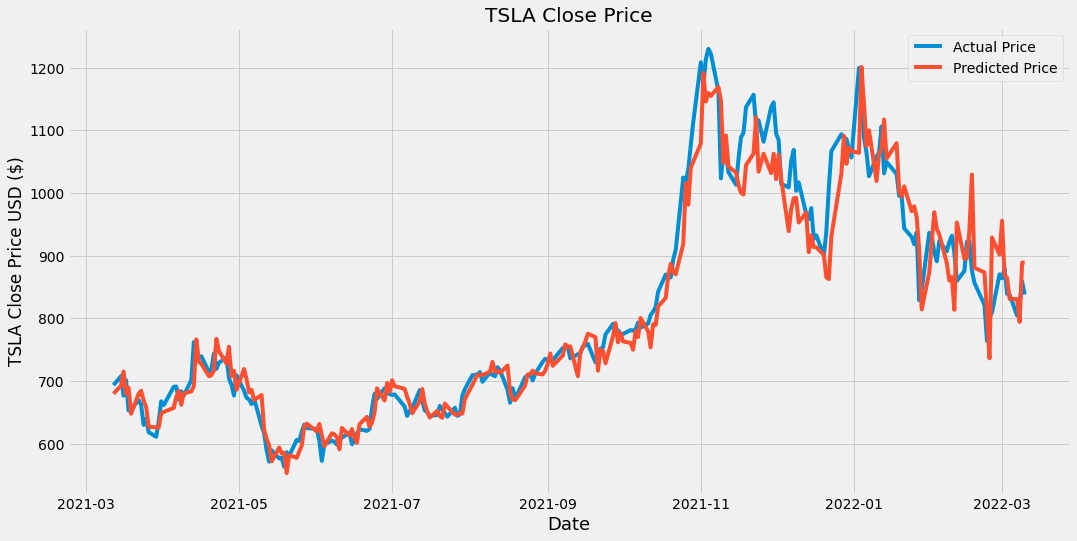

In [193]:
plotModelResultSWA(comparePredictions, "TSLA")

## END OF LSTM SEGMENT, MOVING ON TO ARIMA

ARIMA model has 3 important terms P , D , Q 
P - order of the AR term (auto regressive)
D - number of differencing required to make a time serires stationary
Q - order of the Moving Average term



### ADF TEST

use Augumented Dickey Fuller (ADF) to check if price series is stationary.

The null hypothesis of the ADF test is that the time series is non-stationary. So if the P-Value of the test is less than 0.5 we can reject the null hypothesis and infer that it is stationary. 

But if it is more than 0.5 we will need to find the D.

In [10]:
from statsmodels.tsa.stattools import adfuller 
df = chosen_data[['Close']].copy()
result = adfuller(df.Close.dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: 0.18798968278588885
p-value: 0.9715798694149603


as the P-value is above 0.5 we need to find a value for D and not use 0.

### ACF Correction

In [11]:
#!pip install pmdarima

from pmdarima.arima.utils import ndiffs

In [12]:
ndiffs(df.Close , test = 'adf')

1

## Number of differencing required to make the series stationary = 1

### P 

P is the order of the AR term. It refers to the number of lags to be used as predictors. 
To find P use PACF plot.

In [13]:
from statsmodels.graphics.tsaplots import plot_pacf

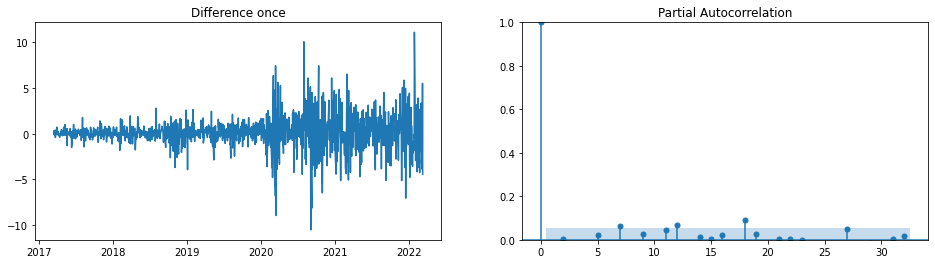

In [14]:
diff = df.Close.diff().dropna()

fig, (ax1,ax2) = plt.subplots (1,2, figsize =(16,4))

ax1.plot(diff)
ax1.set_title("Difference once")

ax2.set_ylim(0,1)
plot_pacf(diff,ax=ax2);

we can observe that PACF lag 7+- is significant as it is above the significance line.

### q

q is the order of MA term. refers to the number of lagged forecast errors that should go into the ARIMA model
to find q make use of a ACF plot

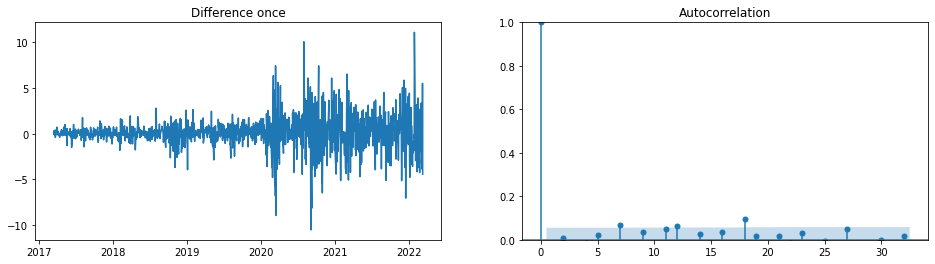

In [15]:
from statsmodels.graphics.tsaplots import plot_acf
diff = df.Close.diff().dropna()

fig, (ax1,ax2) = plt.subplots (1,2, figsize =(16,4))

ax1.plot(diff)
ax1.set_title("Difference once")

ax2.set_ylim(0,1)
plot_acf(diff,ax=ax2);

we can observe that the ACF lag 7 is significant as it is above the significance line

### However as we are only using the first day of the prediction our Q value would be zero as there would be no corelation between past error as we are using the first data point.

In [16]:
Prediction_num = 30

For our ARIMA prediction, we will be only predicting ??? days in advance due to computational limits as we would have to re-train the model after every new day. As such we have just chosen ??? days as it represents ??? This can simply be upscaled by changing the variable Prediction_num value. 



In [110]:


lower_confidence =[]
upper_confidence =[]
train_data, test_data = chosen_data[0:int(len(chosen_data)*0.8)], chosen_data[int(len(chosen_data)*0.8):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(Prediction_num):
    model = ARIMA(history, order=(6,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    LC = output[2].flatten()[0]
    UC = output[2].flatten()[1]
    #print("LC"+LC+"UC"+UC)
    model_predictions.append(yhat)
    lower_confidence.append(LC)
    upper_confidence.append(UC)
    print("AAAA",output)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
    #print("A",output)
    
    
actual_test_data = test_data[0:Prediction_num]

MSE_error = met.mean_squared_error(actual_test_data, model_predictions)
Arima_RMSE = math.sqrt(MSE_error)
print('Testing Root Mean Squared Error is {}'.format(Arima_RMSE))
ARIMAr2 = met.r2_score(actual_test_data,model_predictions)
print('Testing R Squared Error is {}'.format(ARIMAr2))

AAAA (array([122.02611551]), array([1.5484893]), array([[118.99113225, 125.06109878]]))
AAAA (array([121.12596593]), array([1.5480329]), array([[118.0918772 , 124.16005465]]))
AAAA (array([124.0442182]), array([1.54983876]), array([[121.00659006, 127.08184635]]))
AAAA (array([125.18840667]), array([1.54979629]), array([[122.15086175, 128.22595159]]))
AAAA (array([125.06337811]), array([1.5490867]), array([[122.02722397, 128.09953226]]))
AAAA (array([120.89330196]), array([1.55481712]), array([[117.84591639, 123.94068753]]))
AAAA (array([120.08275551]), array([1.55430433]), array([[117.03637501, 123.12913601]]))
AAAA (array([122.93741256]), array([1.55695477]), array([[119.88583729, 125.98898783]]))
AAAA (array([122.75672428]), array([1.55623628]), array([[119.70655721, 125.80689135]]))
AAAA (array([120.50507592]), array([1.55768395]), array([[117.45207147, 123.55808036]]))
AAAA (array([120.92079823]), array([1.55692014]), array([[117.86929082, 123.97230564]]))
AAAA (array([121.31833854


KeyboardInterrupt



In [55]:


lower_confidence =[]
upper_confidence =[]
train_data, test_data = chosen_data[0:int(len(chosen_data)*0.8)], chosen_data[int(len(chosen_data)*0.8):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(Prediction_num):
    model = ARIMA(history, order=(7,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    LC = output[2].flatten()[0]
    UC = output[2].flatten()[1]
    #print("LC"+LC+"UC"+UC)
    model_predictions.append(yhat)
    lower_confidence.append(LC)
    upper_confidence.append(UC)
    
    true_test_value = test_data[time_point]
    history.append(true_test_value)
    print("A",output)
    
    
actual_test_data = test_data[0:Prediction_num]

MSE_error = met.mean_squared_error(actual_test_data, model_predictions)
Arima_RMSE = math.sqrt(MSE_error)
print('Testing Root Mean Squared Error is {}'.format(Arima_RMSE))
ARIMAr2 = met.r2_score(actual_test_data,model_predictions)
print('Testing R Squared Error is {}'.format(ARIMAr2))

Testing Root Mean Squared Error is 2.3412463985956893
Testing R Squared Error is 0.9805911747507605


In [58]:


lower_confidence =[]
upper_confidence =[]
train_data, test_data = chosen_data[0:int(len(chosen_data)*0.8)], chosen_data[int(len(chosen_data)*0.8):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(Prediction_num):
    model = ARIMA(history, order=(8,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    LC = output[2].flatten()[0]
    UC = output[2].flatten()[1]
    #print("LC"+LC+"UC"+UC)
    model_predictions.append(yhat)
    lower_confidence.append(LC)
    upper_confidence.append(UC)
    
    true_test_value = test_data[time_point]
    history.append(true_test_value)
    #print("A",output)
    
    
actual_test_data = test_data[0:Prediction_num]

MSE_error = met.mean_squared_error(actual_test_data, model_predictions)
Arima_RMSE = math.sqrt(MSE_error)
print('Testing Root Mean Squared Error is {}'.format(Arima_RMSE))
ARIMAr2 = met.r2_score(actual_test_data,model_predictions)
print('Testing R Squared Error is {}'.format(ARIMAr2))

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Testing Root Mean Squared Error is 2.337554801827963
Testing R Squared Error is 0.9806523328324733


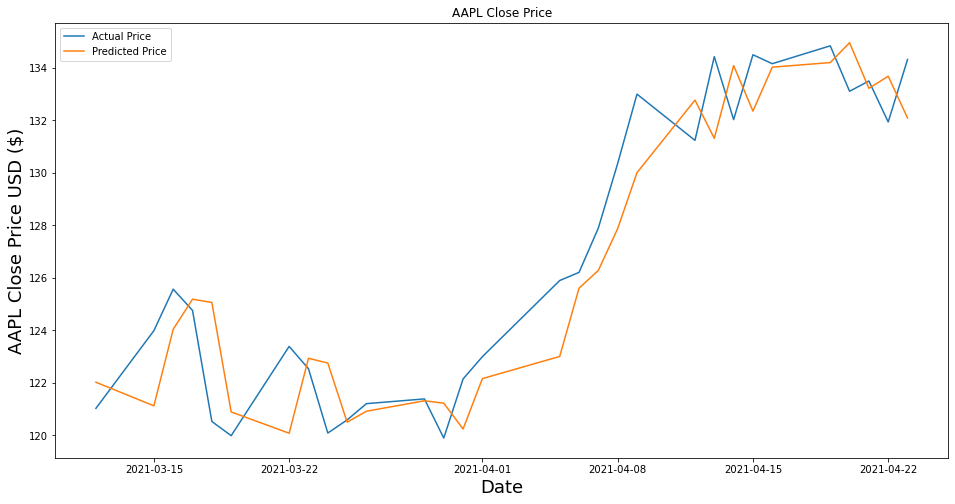

In [18]:
test_set_range = chosen_data[int(len(chosen_data)*0.8):int(len(chosen_data)*0.8)+Prediction_num].index
plt.figure(figsize=(16,8))

plt.plot(test_set_range, actual_test_data, label='Actual Price')
plt.plot(test_set_range, model_predictions, label='Predicted Price')
plt.title("AAPL Close Price")
plt.xlabel('Date',fontsize=18)
plt.ylabel("AAPL Close Price USD ($)",fontsize=18)
#plt.xticks(np.arange(881,1259,50), tesla_data['DateTime'][881:1259:50])
plt.legend()
plt.show()





In [19]:
ARIMA=pd.DataFrame({"Actual":actual_test_data})
ARIMA["Predicted"]=pd.DataFrame(model_predictions)
ARIMA["Lower_conf"] = pd.DataFrame(lower_confidence)
ARIMA["Upper_conf"] = pd.DataFrame(upper_confidence)
ARIMA.head(30)

Actual   Predicted  Lower_conf  Upper_conf
0   121.029999  122.026116  118.991132  125.061099
1   123.989998  121.125966  118.091877  124.160055
2   125.570000  124.044218  121.006590  127.081846
3   124.760002  125.188407  122.150862  128.225952
4   120.529999  125.063378  122.027224  128.099532
5   119.989998  120.893302  117.845916  123.940688
6   123.389999  120.082756  117.036375  123.129136
7   122.540001  122.937413  119.885837  125.988988
8   120.089996  122.756724  119.706557  125.806891
9   120.589996  120.505076  117.452071  123.558080
10  121.209999  120.920798  117.869291  123.972306
11  121.389999  121.318339  118.268280  124.368397
12  119.900002  121.228529  118.179964  124.277094
13  122.150002  120.244894  117.196746  123.293043
14  123.000000  122.163658  119.114776  125.212541
15  125.900002  123.007963  119.960145  126.055781
16  126.209999  125.607180  122.555722  128.658637
17  127.900002  126.286756  123.236566  129.336945
18  130.360001  127.878541  124.828252  130.928830
19  133.000000  130.008535  126.955987  133.061083
20  131.240005  132.772057  129.715567  135.828548
21  134.429993  131.318058  128.261636  134.374479
22  132.029999  134.088116  131.027335  137.148897
23  134.500000  132.354722  129.292879  135.416566
24  134.160004  134.027824  130.964702  137.090945
25  134.839996  134.201745  131.140097  137.263393
26  133.110001  134.959851  131.899440  138.020262
27  133.500000  133.221715  130.160724  136.282706
28  131.940002  133.681980  130.622422  136.741539
29  134.320007  132.090296  129.030385  135.150207

ARIMA Testing Root Mean Squared Error is 42.82069467876911
LSTM Testing Root Mean Squared Error is 91.92137971815178


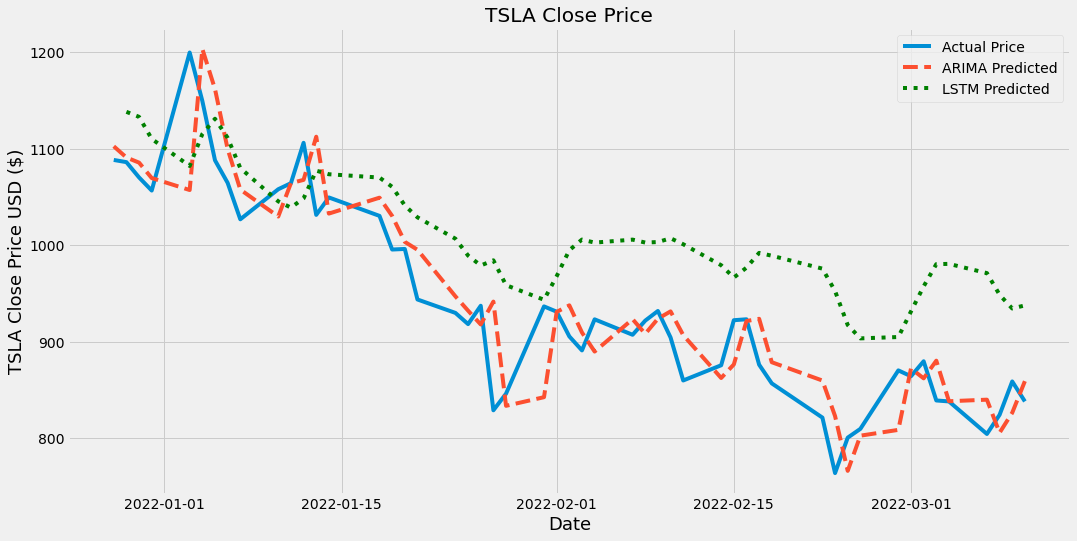

In [66]:
#2 models 
print('ARIMA Testing Root Mean Squared Error is {}'.format(Arima_RMSE))
print('LSTM Testing Root Mean Squared Error is {}'.format(LSTM_RMSE))
plt.figure(figsize=(16,8))

plt.plot(test_set_range, test_data, label='Actual Price')
plt.plot(test_set_range, model_predictions,linestyle='dashed', label='ARIMA Predicted')
plt.plot(LSTM['Predicted'],linestyle='dotted',color='green', label ='LSTM Predicted')
plt.title("TSLA Close Price")
plt.xlabel('Date',fontsize=18)
plt.ylabel("TSLA Close Price USD ($)",fontsize=18)

plt.legend()
plt.show()


### Based on the MSE and R2 value ARIMA has the better for TSLA. (might not be true for other stocks due to different price level swings. 


In [67]:
def getBetterModel(ArimaRMSE,LstmRMSE,ARIMA,LSTM): #deemed that RMSE is more important than R2
    if ArimaRMSE<LstmRMSE:
        print("ARIMA is Optimal")
        return ARIMA #data fram of predicted and actual
    else:
        print("LSTM is Optimal")
        return LSTM

In [20]:
Optimal = ARIMA

In [68]:
Optimal = getBetterModel(Arima_RMSE,LSTM_RMSE,ARIMA,LSTM)
Optimal

ARIMA is Optimal


Actual    Predicted
0   1088.469971  1102.609871
1   1086.189941  1091.007091
2   1070.339966  1085.689602
3   1056.780029  1069.709483
4   1199.780029  1057.302124
5   1149.589966  1203.467294
6   1088.119995  1161.932022
7   1064.699951  1099.729548
8   1026.959961  1057.793503
9   1058.119995  1029.850009
10  1064.400024  1064.468752
11  1106.219971  1067.810278
12  1031.560059  1112.552099
13  1049.609985  1032.904431
14  1030.510010  1049.372687
15   995.650024  1030.438513
16   996.270020  1003.583254
17   943.900024   995.416169
18   930.000000   947.134159
19   918.400024   932.325220
20   937.409973   918.021703
21   829.099976   941.706363
22   846.349976   833.732824
23   936.719971   842.690131
24   931.250000   931.032547
25   905.659973   937.820824
26   891.140015   909.704486
27   923.320007   889.963543
28   907.340027   923.503415
29   922.000000   908.289400
30   932.000000   924.007142
31   904.549988   931.567911
32   860.000000   906.988906
33   875.760010   862.574293
34   922.429993   876.600987
35   923.390015   921.570989
36   876.349976   923.876297
37   856.979980   878.892529
38   821.530029   859.920803
39   764.039978   823.125301
40   800.770020   766.358763
41   809.869995   802.809769
42   870.429993   808.819528
43   864.369995   872.393474
44   879.890015   862.197754
45   839.289978   880.491137
46   838.289978   838.474105
47   804.580017   840.104721
48   824.400024   805.798777
49   858.969971   826.540588
50   838.299988   859.275284

In [21]:
def isLong(actual,predicted):
    return True if float(actual<float(predicted)) else False


In [157]:
def dailySwing(table):
    actual = table['Actual']
    print(type(actual))

    predicted = table['Predicted']
    isCurrentPositionLong = None
    price = 0
    position = 0
    profit = 0
    for day in range(len(table)-1):
        price = actual[day]
        
        nextPrice = predicted[day+1]
        if isCurrentPositionLong is None: #day 0 initalize
            position = price
            if isLong(float(price),float(nextPrice)):
                isCurrentPositionLong = True
            else:
                isCurrentPositionLong= False
    
                      
         
        if isLong(actual[day],predicted[day+1]): #predicted increase tomorrow
            if isCurrentPositionLong:
                continue
                  
            else:
                #print("SL day",day)
                profit +=   position - price 
                #print("Current Profit ",profit,"day ",day,"position",position, "Price",price)
                position = price
                #print("new pos",position)
                isCurrentPositionLong = True
                
        else: #predicted decrease tomorrow
            if not isCurrentPositionLong:
                continue
                  
            else:
                #print("LS day",day)
                profit += price - position 
                #print("Current Profit ",profit,"day ",day,"position",position,"Price",price)
                position = price
                #print("new pos",position)
                isCurrentPositionLong = False
                
    if isCurrentPositionLong:
        profit += actual[len(table)-1] - position 
        
    else:
        profit +=   position - actual[len(table)-1]
    return profit

In [199]:
profit = dailySwing(Optimal)
profit

<class 'pandas.core.series.Series'>


28.54998779296875

In [172]:
def minMaxSwing(table):
    predicted = table['Predicted']
    actual=table["Actual"]
    minVal = predicted[0]
    maxVal = predicted[0]
    minDay = 0
    maxDay = 0
    for day in range(len(predicted)):
        if minVal> predicted[day]:
            minVal =predicted[day]
            minDay = day
        if maxVal < predicted[day]:
            maxVal = predicted[day]
            maxDay = day
    if maxDay>minDay:
        print("Long Position Swing")
        print("Buy on day", minDay,"at predicted",predicted[minDay],"But actual is ",actual[minDay])
        print("Sell on day", maxDay,"at predicted",predicted[maxDay],"but actual is",actual[maxDay])
        print("For profit" ,actual[maxDay]-actual[minDay])
    else:
        print("Short Position Swing")
        print("Start short on ", maxDay,"with predicted price of",predicted[maxDay],"But actual is",actual[maxDay])
        print("Sell short on ",minDay,"at predicted",predicted[minDay],"but actual is",actual[minDay])
        print("For profit" ,actual[maxDay]-actual[minDay])
    return actual[maxDay]-actual[minDay]

In [200]:
minMaxSwing(Optimal)

Short Position Swing
Start short on  0 with predicted price of 1138.3177 But actual is 1086.18994140625
Sell short on  40 at predicted 903.6021 but actual is 809.8699951171875
For profit 276.3199462890625


In [174]:
def buyandHold(table):
    actual = table['Actual']
    buy = actual[0]
    sell = actual[len(actual)-1]
    profit = sell - buy
    if profit<0:
        print("loss",profit)
        return profit
    else:
        print("profit",profit)
        return profit

In [201]:
buyandHold(Optimal)

loss -247.88995361328125


-247.88995361328125

In [93]:
def longOnly(table):
    actual = table['Actual']
    print(type(actual))

    predicted = table['Predicted']
    activePosition = False
    price = 0
    position = 0
    profit = 0
    for day in range(len(table)-1):
        price = actual[day]
        
        nextPrice = predicted[day+1]        
                               
        if isLong(price,nextPrice): #predicted increase tomorrow
            if activePosition:
                continue
            else:
                position = price
                
                activePosition=True
                  
                
        else: #predicted decrease tomorrow
            #print("LS day",day)
            if activePosition:
                profit += price - position #selling off position
               
                activePosition = False
                
    if activePosition:
        profit += actual[len(table)-1] - position 
        
    return profit

In [94]:
longOnlyProfit = longOnly(Optimal)
longOnlyProfit

<class 'pandas.core.series.Series'>


15.529991149902344

In [51]:
def shortOnly(table):
    actual = table['Actual']
    print(type(actual))

    predicted = table['Predicted']
    activePosition = False
    price = 0
    position = 0
    profit = 0
    for day in range(len(table)-1):
        price = actual[day]
        
        nextPrice = predicted[day+1]        
                               
        if not isLong(price,nextPrice): #predicted decrease tomorrow
            if activePosition:
                continue
            else:
                position = price
                
                activePosition=True
                  
                
        else: #predicted increase tomorrow
            #print("LS day",day)
            if activePosition:
                profit +=  position - price #selling off position
               
                activePosition = False
                
    if activePosition:
        profit += position -actual[len(table)-1]
        
    return profit

In [52]:
shortOnlyProfit=shortOnly(Optimal)
shortOnlyProfit

<class 'pandas.core.series.Series'>


2.2399826049804688

In [58]:
def getConfidenceShort(lower_conf: float, upper_conf:float, currentPrice: float) -> float:
    # Naive implementation, estimate confidence in relation to loss
    if upper_conf < currentPrice: return 1.0;
    return (currentPrice-lower_conf)/(upper_conf - lower_conf)

def getConfidenceLong(lower_conf: float, upper_conf:float, currentPrice: float) -> float:
    # Naive implementation, estimate confidence in relation to loss
    if lower_conf > currentPrice: return 1.0;
    return 1 - (currentPrice-lower_conf)/(upper_conf - lower_conf)


In [99]:
getConfidenceShort(5,9,6)

0.25

In [103]:
def amountToInvest(capital: float, confidence: float, risk: int)->float:
    if risk ==1:
        
        CONST_MAX_PERCENT_CAPITAL = 0.25
    elif risk ==2:
        CONST_MAX_PERCENT_CAPITAL = 0.5
    else:
        CONST_MAX_PERCENT_CAPITAL = 0.75

    return confidence*CONST_MAX_PERCENT_CAPITAL*capital

In [86]:
getConfidenceLong(1,8,4)

0.5714285714285714

In [89]:
# confidence = confidence for PredictionNum of days. Days start from 1
# actual = Optimal['Actual']
# predicted = Optimal['Predicted']
# confidence = [getConfidence(lower_confidence[day-1], upper_confidence[day-1], actual[day-1]) for day in range(1,Prediction_num)]
def trade(capital: float, profit: float ,isLong: bool,day: int, price: float, position: float, risk:int,lowerConf: list,
       upperConf:list  ) -> (float,float):
    
    if(isLong):
        _confidence = getConfidenceLong(lowerConf[day], upperConf[day], price)
        
    else:
        _confidence = getConfidenceShort(lowerConf[day], upperConf[day], price)
        
    transaction_value = amountToInvest(capital,_confidence,risk)
    if isLong:
        capital -= transaction_value;
    
    numStocks = transaction_value/position;
    if not isLong # short:
        profit +=  (position - price)*numStocks #selling off position
    else: #long
        profit += (price - position)*numStocks
        
    capital = capital + profit
    return (capital, profit)
    
    
    
    
    

In [90]:
def shortOnly(table, capital,risk):
    actual = table['Actual']
    print(type(actual))
    
    
    predicted = table['Predicted']
    activePosition = False
    price = 0
    position = 0
    profit = 0
    for day in range(len(table)-1):
        price = actual[day]
        
        nextPrice = predicted[day+1]        
                               
        if not isLong(price,nextPrice): #predicted decrease tomorrow
            if activePosition:
                continue
            else:
                position = price
                
                activePosition=True #BUY
                  
                
        else: #predicted increase tomorrow
            #print("LS day",day)
            if activePosition:
                
                capital, profit = trade(capital, profit, False, day, price,position,risk,table['Lower_conf'],table['Upper_conf'])
#                 transaction_value = amountToInvest(capital,confidence)
#                 capital -= transaction_value;
                
#                 numStocks = transcation_value/position;
#                 profit +=  (position - price)*numStocks #selling off position
               
                activePosition = False # SELL
                
    if activePosition:
        #capital, profit = trade(capital, profit, False, day, price,position)
        profit += position - actual[len(table)-1]
        
    return profit

In [104]:
shortOnly(Optimal,1000000,3)

<class 'pandas.core.series.Series'>


4093.3528954232015

In [101]:
def longOnly(table,capital,risk):
    actual = table['Actual']
    print(type(actual))

    predicted = table['Predicted']
    activePosition = False
    price = 0
    position = 0
    profit = 0
    for day in range(len(table)-1):
        price = actual[day]
        
        nextPrice = predicted[day+1]        
                               
        if isLong(price,nextPrice): #predicted increase tomorrow
            if activePosition:
                continue
            else:
                position = price
                
                activePosition=True
                  
                
        else: #predicted decrease tomorrow
            #print("LS day",day)
            if activePosition:
                capital, profit = trade(capital, profit, True, day, price,position,risk,table['Lower_conf'],table['Upper_conf'])
                #profit += price - position #selling off position
               
                activePosition = False
                
    if activePosition: #closing o
        profit += actual[len(table)-1] - position 
        
    return profit

In [105]:
longOnly(Optimal,1000,3)

<class 'pandas.core.series.Series'>


7.207736969191854

In [88]:
Optimal.head()

Actual   Predicted  Lower_conf  Upper_conf
0  121.029999  122.026116  118.991132  125.061099
1  123.989998  121.125966  118.091877  124.160055
2  125.570000  124.044218  121.006590  127.081846
3  124.760002  125.188407  122.150862  128.225952
4  120.529999  125.063378  122.027224  128.099532

In [95]:
def dailySwing(table,capital,risk):
    actual = table['Actual']
    print(type(actual))

    predicted = table['Predicted']
    isCurrentPositionLong = None
    price = 0
    position = 0
    profit = 0
    for day in range(len(table)-1):
        price = actual[day]
        
        nextPrice = predicted[day+1]
        if isCurrentPositionLong is None: #day 0 initalize
            position = price
            if isLong(float(price),float(nextPrice)):
                isCurrentPositionLong = True
            else:
                isCurrentPositionLong= False
    
                      
         
        if isLong(actual[day],predicted[day+1]): #predicted increase tomorrow
            if isCurrentPositionLong:
                continue
                  
            else:#we are in short position but tomorrow go up so we sell
                #print("SL day",day)
                capital, profit = trade(capital, profit, False, day, price,position,risk,table['Lower_conf'],table['Upper_conf'])
                #print("Current Profit ",profit,"day ",day,"position",position, "Price",price)
                
                
                position = price #buying the long
                #print("new pos",position)
                isCurrentPositionLong = True
                
        else: #predicted decrease tomorrow
            if not isCurrentPositionLong: #currently short position
                continue
                  
            else: #we are in long position but need to sell
                #print("LS day",day)
                capital, profit = trade(capital, profit, True, day, price,position,risk,table['Lower_conf'],table['Upper_conf'])
                
                
                #print("Current Profit ",profit,"day ",day,"position",position,"Price",price)
                position = price #start the short position
                #print("new pos",position)
                isCurrentPositionLong = False
                
    if isCurrentPositionLong:
        profit += actual[len(table)-1] - position 
        
    else:
        profit +=   position - actual[len(table)-1]
    return profit

In [106]:
dailySwing(Optimal,1000000,3)

<class 'pandas.core.series.Series'>


10883.28214239381